## Load the dataset

### Subtask:
Load the `ads_daily_preview.csv` dataset into a Pandas DataFrame to begin our analysis.


**Reasoning**:
To load the dataset, I need to first import the pandas library and then use its `read_csv` function to load the specified file into a DataFrame.



In [2]:
import pandas as pd

# Load the ads_daily_preview.csv file into a DataFrame named df
df = pd.read_csv('/content/ads_daily_preview.csv')

# Display the first few rows of the DataFrame to verify it loaded correctly
print("DataFrame loaded successfully. First 5 rows:")
print(df.head())

DataFrame loaded successfully. First 5 rows:
   event_date campaign_id geo   device audience_id  impressions  clicks  \
0  2025-01-01       cmp_1  US   mobile       aud_2          492       2   
1  2025-01-01       cmp_1  US  desktop       aud_5          524       3   
2  2025-01-01       cmp_1  US   tablet       aud_2          497       5   
3  2025-01-01       cmp_1  GB   mobile       aud_4          470       8   
4  2025-01-01       cmp_1  GB  desktop       aud_6          446       0   

   conversions  cost  
0            1  1.91  
1            0  1.92  
2            0  1.67  
3            0  1.69  
4            0  1.48  


## Initial Data Inspection

### Subtask:
Perform an initial inspection of the loaded dataset. This includes checking the data types, column names, and basic summary statistics to understand its structure and content.


**Reasoning**:
To perform an initial inspection, I need to check the data types, column names, and basic summary statistics of the DataFrame. These can all be done in a single code block using `df.info()`, `df.columns`, and `df.describe()`.



In [3]:
print("\n--- DataFrame Info ---")
df.info()

print("\n--- Column Names ---")
print(df.columns.tolist())

print("\n--- Descriptive Statistics ---")
print(df.describe())


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   event_date   10 non-null     object 
 1   campaign_id  10 non-null     object 
 2   geo          10 non-null     object 
 3   device       10 non-null     object 
 4   audience_id  10 non-null     object 
 5   impressions  10 non-null     int64  
 6   clicks       10 non-null     int64  
 7   conversions  10 non-null     int64  
 8   cost         10 non-null     float64
dtypes: float64(1), int64(3), object(5)
memory usage: 852.0+ bytes

--- Column Names ---
['event_date', 'campaign_id', 'geo', 'device', 'audience_id', 'impressions', 'clicks', 'conversions', 'cost']

--- Descriptive Statistics ---
       impressions     clicks  conversions       cost
count    10.000000  10.000000    10.000000  10.000000
mean    489.900000   4.100000     0.100000   1.788000
std      23.149034  

## Data Cleaning and Preprocessing

### Subtask:
Address any data quality issues by identifying and handling missing values, incorrect data types, or other inconsistencies to ensure the data is ready for analysis.


**Reasoning**:
To convert the 'event_date' column to datetime, I will use `pd.to_datetime()` and then display the DataFrame's info and head to verify the change.



In [4]:
df['event_date'] = pd.to_datetime(df['event_date'])

print("--- DataFrame Info after date conversion ---")
df.info()

print("\n--- First 5 rows after date conversion ---")
print(df.head())

--- DataFrame Info after date conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   event_date   10 non-null     datetime64[ns]
 1   campaign_id  10 non-null     object        
 2   geo          10 non-null     object        
 3   device       10 non-null     object        
 4   audience_id  10 non-null     object        
 5   impressions  10 non-null     int64         
 6   clicks       10 non-null     int64         
 7   conversions  10 non-null     int64         
 8   cost         10 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 852.0+ bytes

--- First 5 rows after date conversion ---
  event_date campaign_id geo   device audience_id  impressions  clicks  \
0 2025-01-01       cmp_1  US   mobile       aud_2          492       2   
1 2025-01-01       cmp_1  US  desktop

**Reasoning**:
To further address data quality, I will check for missing values in the DataFrame, as this is a common data quality issue that needs to be handled. I will use `df.isnull().sum()` to get a count of missing values per column.



In [5]:
print("\n--- Missing values per column ---")
print(df.isnull().sum())


--- Missing values per column ---
event_date     0
campaign_id    0
geo            0
device         0
audience_id    0
impressions    0
clicks         0
conversions    0
cost           0
dtype: int64


**Reasoning**:
After handling missing values and converting data types, I will now check for and remove any duplicate rows to ensure data uniqueness and prevent skewed analysis.



In [6]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]

print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after removing duplicates: {final_rows}")

if initial_rows > final_rows:
    print(f"{initial_rows - final_rows} duplicate rows were removed.")
else:
    print("No duplicate rows found.")


Initial number of rows: 10
Number of rows after removing duplicates: 10
No duplicate rows found.


**Reasoning**:
To ensure consistency and identify any potential inconsistencies or typos in categorical data, I will inspect the unique values in the `campaign_id`, `geo`, `device`, and `audience_id` columns.



In [7]:
print("--- Unique values for categorical columns ---")
for col in ['campaign_id', 'geo', 'device', 'audience_id']:
    print(f"\nUnique values for {col}: {df[col].unique()}")

--- Unique values for categorical columns ---

Unique values for campaign_id: ['cmp_1']

Unique values for geo: ['US' 'GB' 'IN' 'DE']

Unique values for device: ['mobile' 'desktop' 'tablet']

Unique values for audience_id: ['aud_2' 'aud_5' 'aud_4' 'aud_6' 'aud_1' 'aud_7' 'aud_3']


## Exploratory Data Analysis (EDA)

### Subtask:
Conduct detailed exploratory data analysis to uncover patterns, relationships, and anomalies within the advertising data, potentially using visualizations to aid understanding.


**Reasoning**:
To begin the exploratory data analysis and understand the distribution of numerical columns, I need to import the necessary visualization libraries (`matplotlib.pyplot` and `seaborn`) and then generate histograms for 'impressions', 'clicks', 'conversions', and 'cost'.



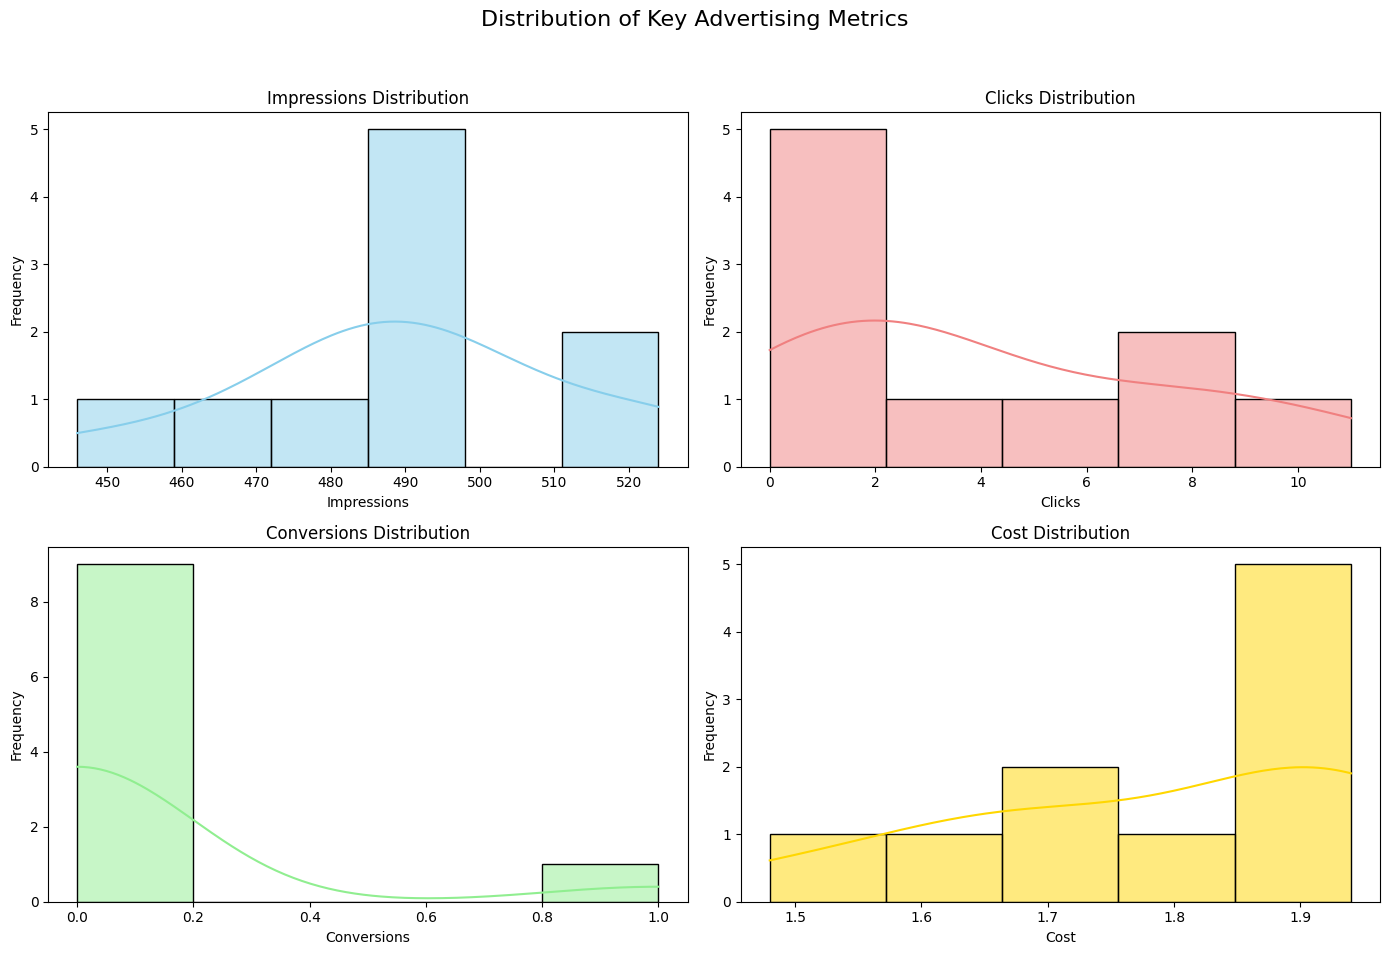

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for the histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Key Advertising Metrics', fontsize=16)

# Plot histogram for 'impressions'
sns.histplot(df['impressions'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Impressions Distribution')
axes[0, 0].set_xlabel('Impressions')
axes[0, 0].set_ylabel('Frequency')

# Plot histogram for 'clicks'
sns.histplot(df['clicks'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Clicks Distribution')
axes[0, 1].set_xlabel('Clicks')
axes[0, 1].set_ylabel('Frequency')

# Plot histogram for 'conversions'
sns.histplot(df['conversions'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Conversions Distribution')
axes[1, 0].set_xlabel('Conversions')
axes[1, 0].set_ylabel('Frequency')

# Plot histogram for 'cost'
sns.histplot(df['cost'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Cost Distribution')
axes[1, 1].set_xlabel('Cost')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

**Reasoning**:
To further explore the relationships between numerical advertising metrics, I will calculate and visualize the correlation matrix using a heatmap. This will help identify any strong positive or negative correlations that might exist between `impressions`, `clicks`, `conversions`, and `cost`.



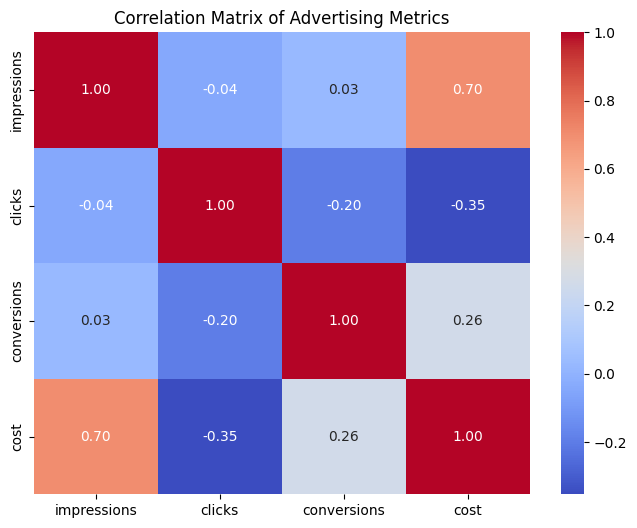

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['impressions', 'clicks', 'conversions', 'cost']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Advertising Metrics')
plt.show()


**Reasoning**:
To understand the impact of geographical location on advertising performance, I will visualize the average impressions, clicks, conversions, and cost per geographic region.



/tmp/ipython-input-2274490642.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='geo', y='impressions', data=df, ax=axes[0, 0], palette='viridis')
/tmp/ipython-input-2274490642.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='geo', y='clicks', data=df, ax=axes[0, 1], palette='plasma')
/tmp/ipython-input-2274490642.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='geo', y='conversions', data=df, ax=axes[1, 0], palette='magma')
/tmp/ipython-input-2274490642.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is de

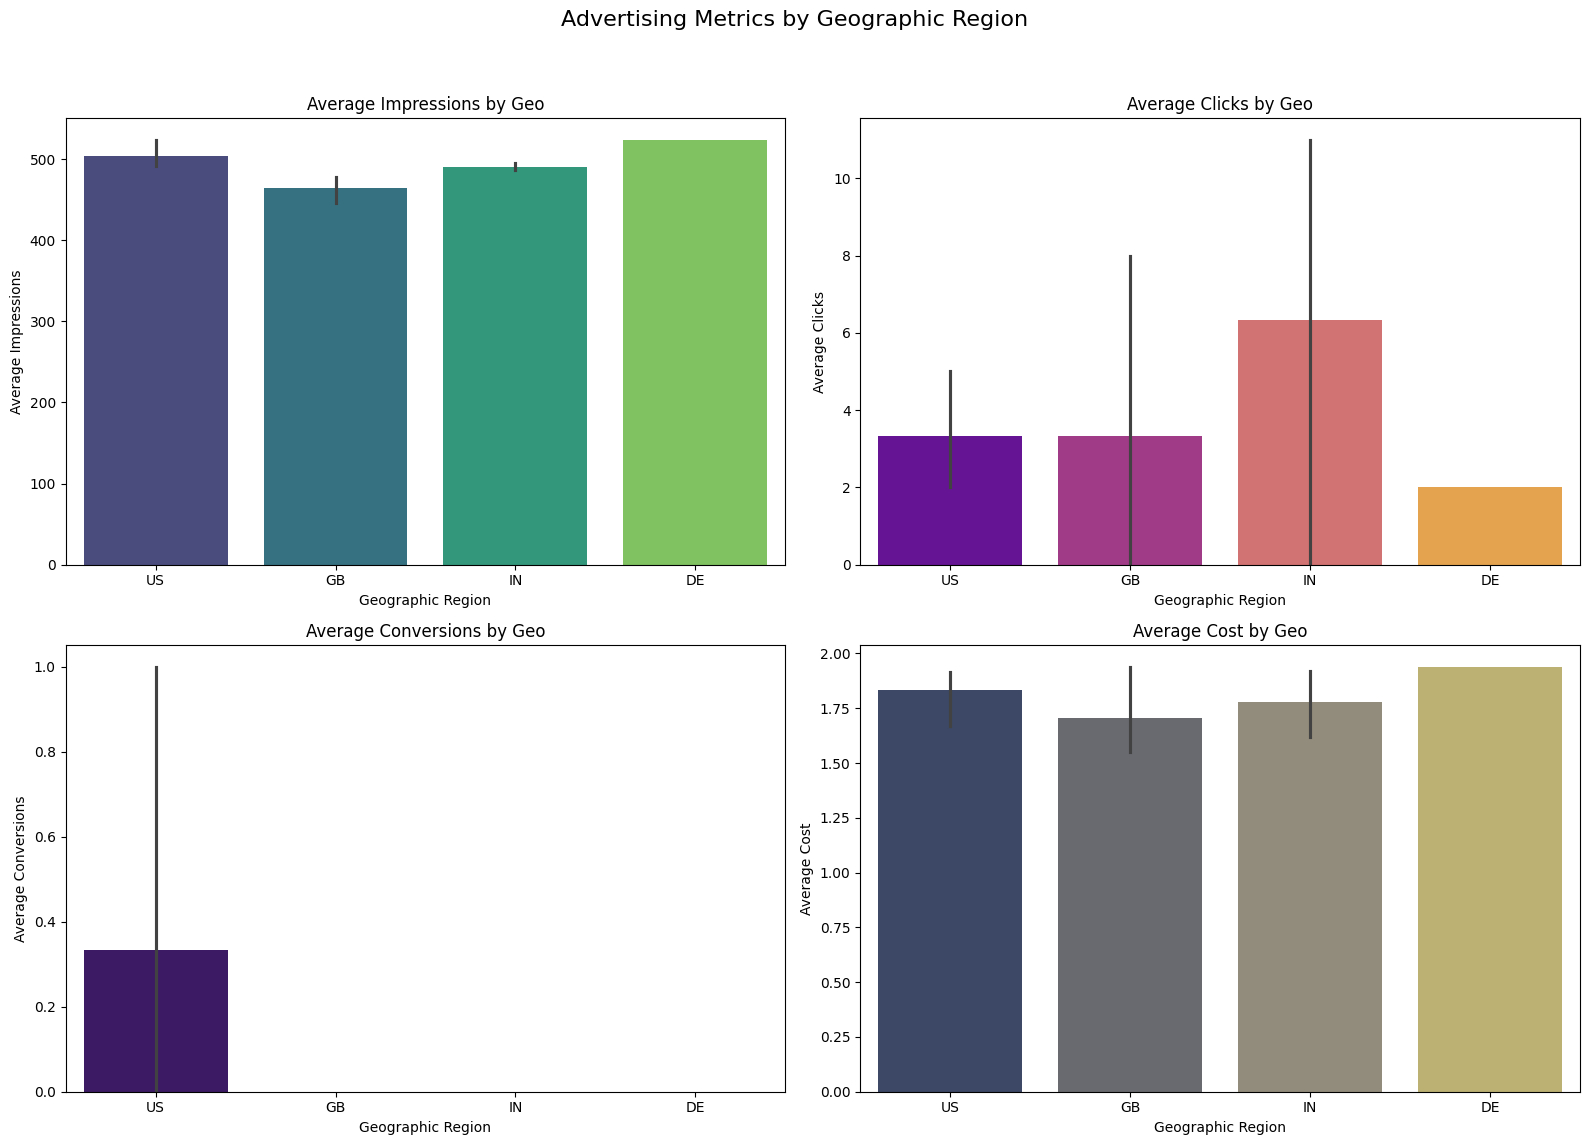

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Advertising Metrics by Geographic Region', fontsize=16)

sns.barplot(x='geo', y='impressions', data=df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Average Impressions by Geo')
axes[0, 0].set_xlabel('Geographic Region')
axes[0, 0].set_ylabel('Average Impressions')

sns.barplot(x='geo', y='clicks', data=df, ax=axes[0, 1], palette='plasma')
axes[0, 1].set_title('Average Clicks by Geo')
axes[0, 1].set_xlabel('Geographic Region')
axes[0, 1].set_ylabel('Average Clicks')

sns.barplot(x='geo', y='conversions', data=df, ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Average Conversions by Geo')
axes[1, 0].set_xlabel('Geographic Region')
axes[1, 0].set_ylabel('Average Conversions')

sns.barplot(x='geo', y='cost', data=df, ax=axes[1, 1], palette='cividis')
axes[1, 1].set_title('Average Cost by Geo')
axes[1, 1].set_xlabel('Geographic Region')
axes[1, 1].set_ylabel('Average Cost')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Reasoning**:
The previous code produced a FutureWarning regarding the use of `palette` without `hue`. To fix this and align with future Seaborn versions, I will explicitly set `hue='geo'` and `legend=False` in each `sns.barplot` call.



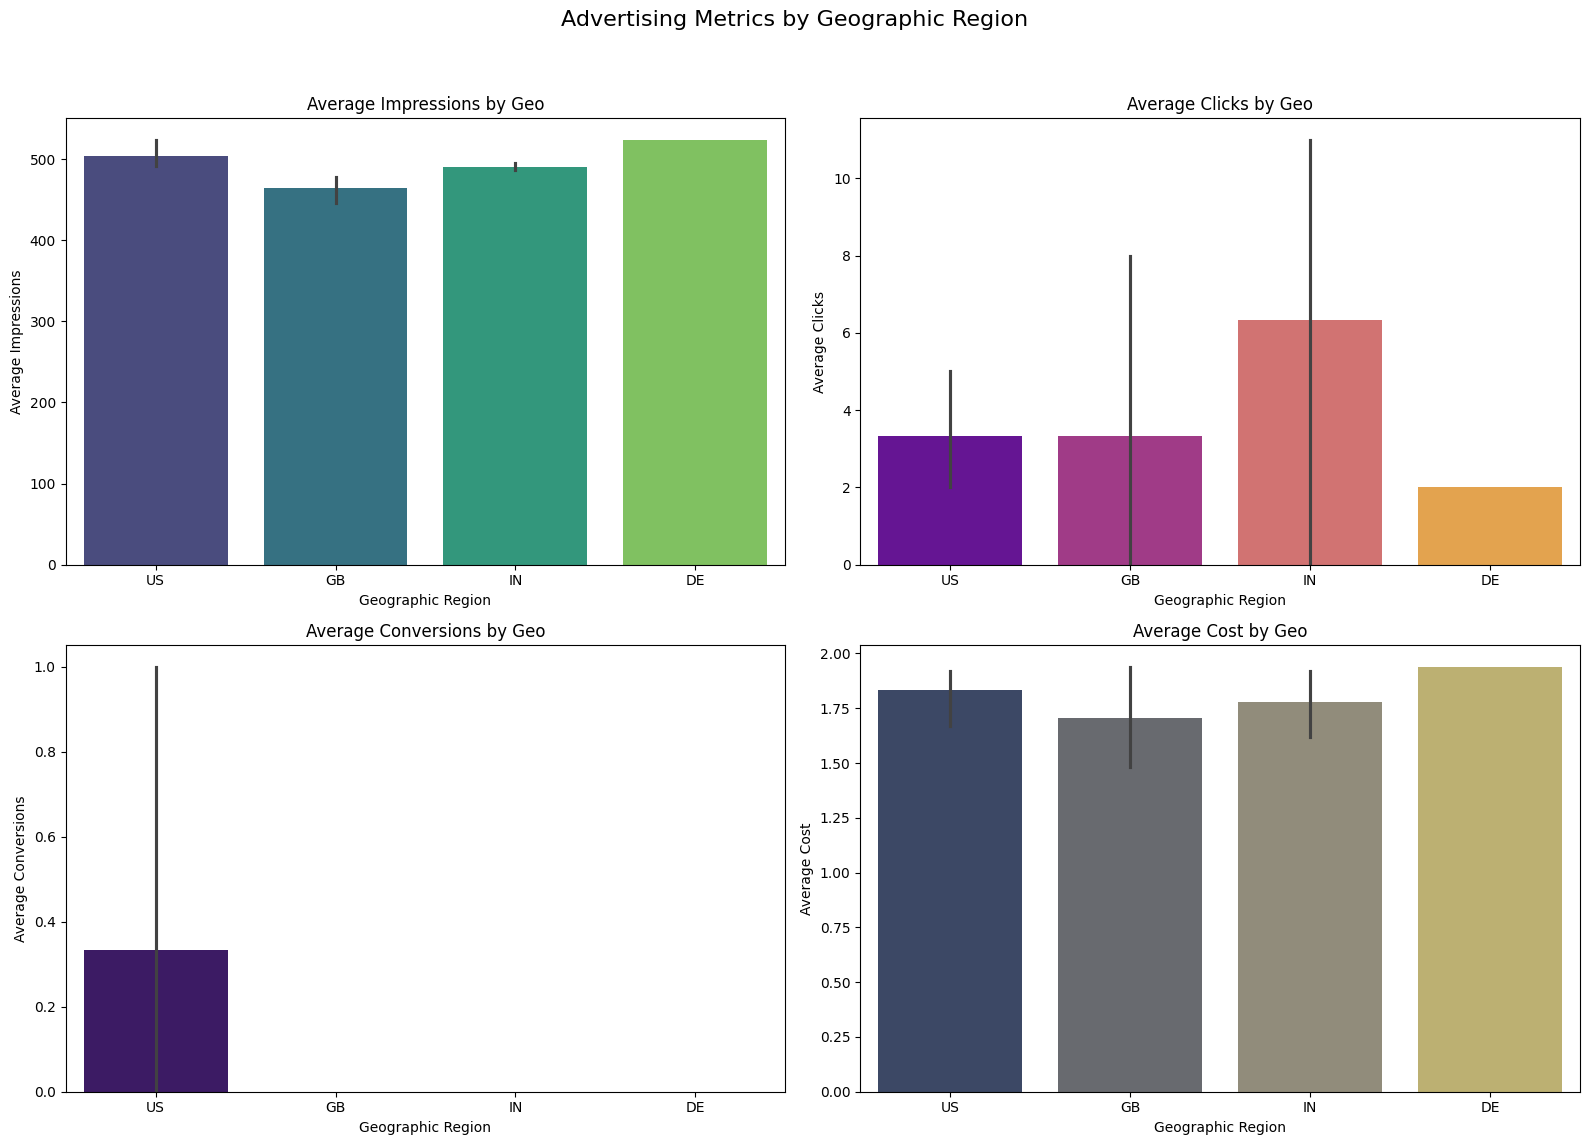

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Advertising Metrics by Geographic Region', fontsize=16)

sns.barplot(x='geo', y='impressions', data=df, ax=axes[0, 0], palette='viridis', hue='geo', legend=False)
axes[0, 0].set_title('Average Impressions by Geo')
axes[0, 0].set_xlabel('Geographic Region')
axes[0, 0].set_ylabel('Average Impressions')

sns.barplot(x='geo', y='clicks', data=df, ax=axes[0, 1], palette='plasma', hue='geo', legend=False)
axes[0, 1].set_title('Average Clicks by Geo')
axes[0, 1].set_xlabel('Geographic Region')
axes[0, 1].set_ylabel('Average Clicks')

sns.barplot(x='geo', y='conversions', data=df, ax=axes[1, 0], palette='magma', hue='geo', legend=False)
axes[1, 0].set_title('Average Conversions by Geo')
axes[1, 0].set_xlabel('Geographic Region')
axes[1, 0].set_ylabel('Average Conversions')

sns.barplot(x='geo', y='cost', data=df, ax=axes[1, 1], palette='cividis', hue='geo', legend=False)
axes[1, 1].set_title('Average Cost by Geo')
axes[1, 1].set_xlabel('Geographic Region')
axes[1, 1].set_ylabel('Average Cost')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Reasoning**:
To further understand advertising performance, I will now visualize the average impressions, clicks, conversions, and cost per device type, similar to the geographical analysis.



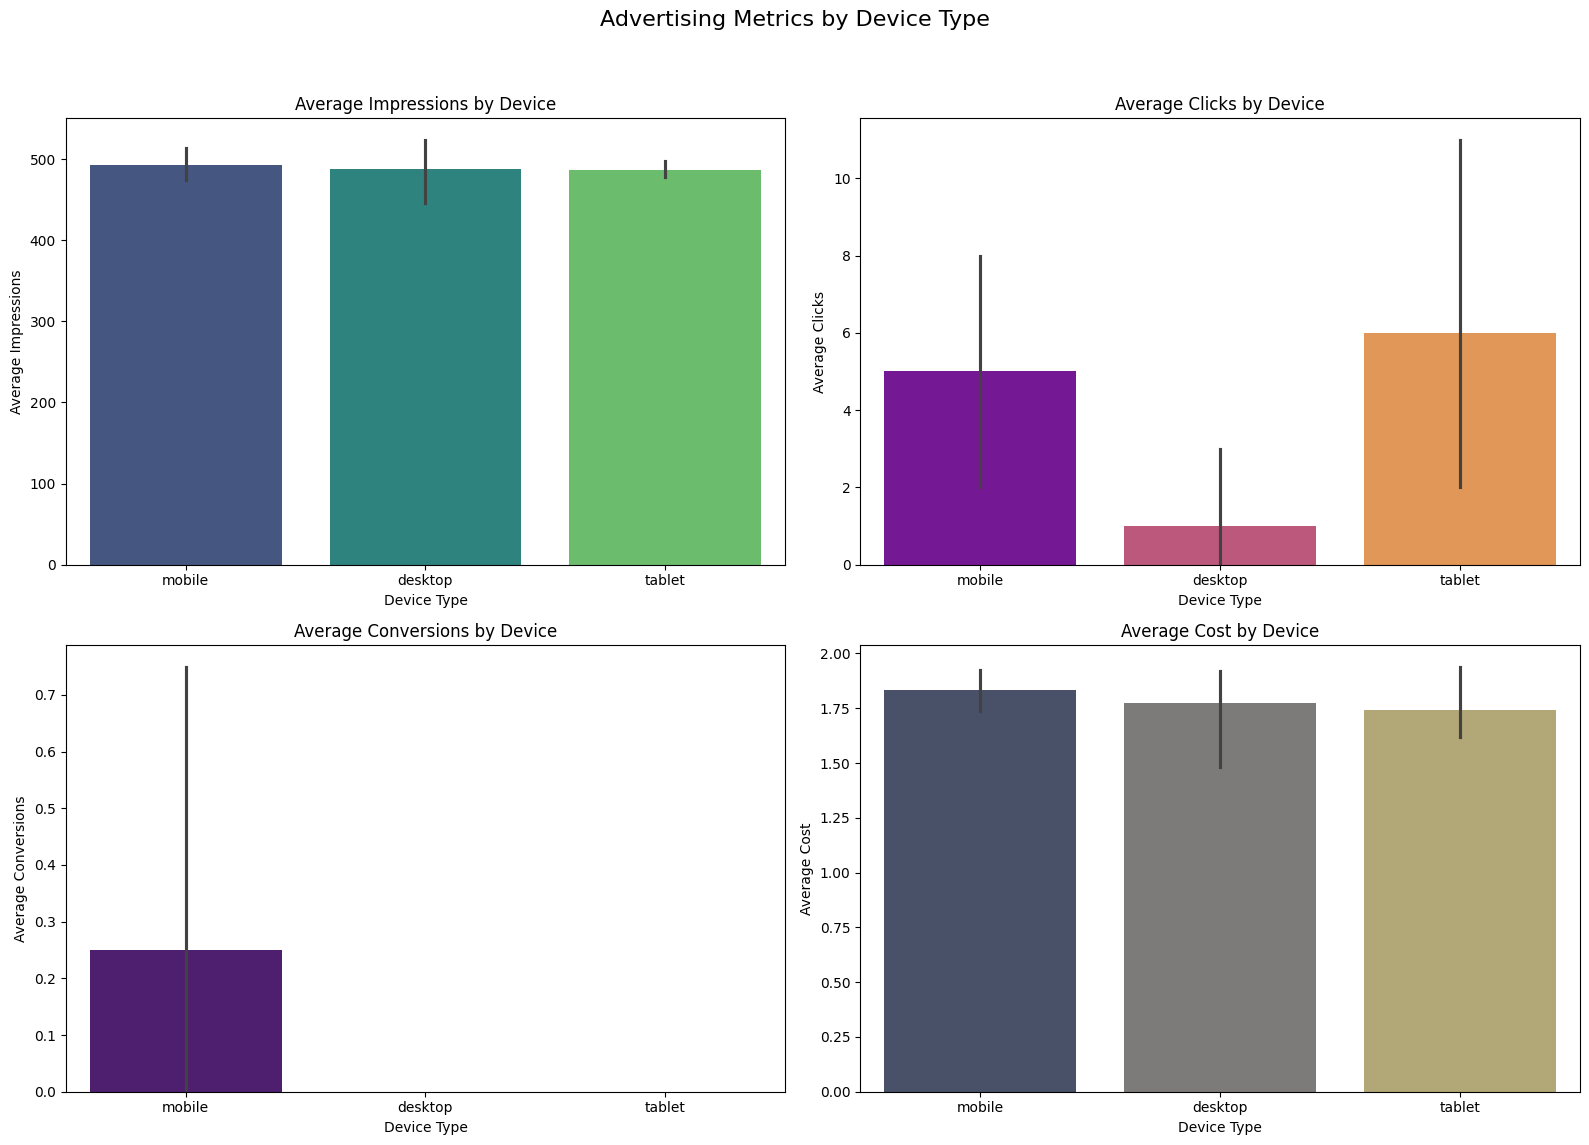

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Advertising Metrics by Device Type', fontsize=16)

sns.barplot(x='device', y='impressions', data=df, ax=axes[0, 0], palette='viridis', hue='device', legend=False)
axes[0, 0].set_title('Average Impressions by Device')
axes[0, 0].set_xlabel('Device Type')
axes[0, 0].set_ylabel('Average Impressions')

sns.barplot(x='device', y='clicks', data=df, ax=axes[0, 1], palette='plasma', hue='device', legend=False)
axes[0, 1].set_title('Average Clicks by Device')
axes[0, 1].set_xlabel('Device Type')
axes[0, 1].set_ylabel('Average Clicks')

sns.barplot(x='device', y='conversions', data=df, ax=axes[1, 0], palette='magma', hue='device', legend=False)
axes[1, 0].set_title('Average Conversions by Device')
axes[1, 0].set_xlabel('Device Type')
axes[1, 0].set_ylabel('Average Conversions')

sns.barplot(x='device', y='cost', data=df, ax=axes[1, 1], palette='cividis', hue='device', legend=False)
axes[1, 1].set_title('Average Cost by Device')
axes[1, 1].set_xlabel('Device Type')
axes[1, 1].set_ylabel('Average Cost')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Key Metrics and Performance Analysis

### Subtask:
Calculate key advertising performance metrics (Click-Through Rate, Cost Per Click, Conversion Rate, Cost Per Conversion) and add them to the DataFrame.


**Reasoning**:
To calculate the key advertising performance metrics (CTR, CPC, CVR, CPA) as specified in the instructions, I need to perform element-wise division and multiplication operations on the DataFrame columns, carefully handling division by zero scenarios for CPC, CVR, and CPA. I will then add these as new columns to the DataFrame and display the first few rows to verify the additions.



In [13]:
import numpy as np

# 1. Calculate Click-Through Rate (CTR)
df['CTR'] = (df['clicks'] / df['impressions']) * 100

# 2. Calculate Cost Per Click (CPC)
# Handle division by zero for clicks
df['CPC'] = np.where(df['clicks'] == 0, 0, df['cost'] / df['clicks'])

# 3. Calculate Conversion Rate (CVR)
# Handle division by zero for clicks
df['CVR'] = np.where(df['clicks'] == 0, 0, (df['conversions'] / df['clicks']) * 100)

# 4. Calculate Cost Per Conversion (CPA)
# Handle division by zero for conversions
df['CPA'] = np.where(df['conversions'] == 0, 0, df['cost'] / df['conversions'])

# 5. Display the first few rows of the DataFrame with the newly calculated metrics
print("DataFrame with new calculated metrics:")
print(df.head())

DataFrame with new calculated metrics:
  event_date campaign_id geo   device audience_id  impressions  clicks  \
0 2025-01-01       cmp_1  US   mobile       aud_2          492       2   
1 2025-01-01       cmp_1  US  desktop       aud_5          524       3   
2 2025-01-01       cmp_1  US   tablet       aud_2          497       5   
3 2025-01-01       cmp_1  GB   mobile       aud_4          470       8   
4 2025-01-01       cmp_1  GB  desktop       aud_6          446       0   

   conversions  cost       CTR      CPC   CVR   CPA  
0            1  1.91  0.406504  0.95500  50.0  1.91  
1            0  1.92  0.572519  0.64000   0.0  0.00  
2            0  1.67  1.006036  0.33400   0.0  0.00  
3            0  1.69  1.702128  0.21125   0.0  0.00  
4            0  1.48  0.000000  0.00000   0.0  0.00  


# Task
The next step is to analyze the advertising data to identify key usage columns for Product-Led Growth (PLG) metrics. For this, `event_date` will be used as the date column, `audience_id` as the user/account identifier, and `clicks` and `conversions` as the metrics/events.

Next, aggregate the `clicks` and `conversions` by `audience_id` on a daily and weekly basis.

## Identify Key Usage Columns

### Subtask:
Examine the dataset to explicitly identify columns that represent the 'date', 'account/user', and 'metric or event' for usage analysis. We will use `event_date` for date, `audience_id` as a proxy for 'user/account', and 'clicks' and 'conversions' as 'events/metrics' within this advertising context.


Based on the dataset and the subtask description, the key usage columns are identified as follows:

*   **Date Column**: `event_date`
*   **Account/User Column**: `audience_id`
*   **Metric/Event Columns**: `clicks` and `conversions`

## Aggregate Customer-Level Usage

### Subtask:
Aggregate the identified usage metrics (clicks, conversions) by `audience_id` (as customer/user) on a daily and weekly basis to build foundational usage signals.


**Reasoning**:
To create the daily aggregated DataFrame, I will group the original DataFrame `df` by `event_date` and `audience_id`, then sum the `clicks` and `conversions` columns, and finally reset the index.



In [14]:
daily_agg_df = df.groupby(['event_date', 'audience_id'])[['clicks', 'conversions']].sum().reset_index()
print("Daily Aggregated DataFrame (first 5 rows):")
print(daily_agg_df.head())

Daily Aggregated DataFrame (first 5 rows):
  event_date audience_id  clicks  conversions
0 2025-01-01       aud_1       2            0
1 2025-01-01       aud_2       7            1
2 2025-01-01       aud_3      11            0
3 2025-01-01       aud_4      10            0
4 2025-01-01       aud_5       3            0


**Reasoning**:
To create the weekly aggregated DataFrame, I first need to extract the week number from the 'event_date' column in the original DataFrame `df`, and then group by this new 'week' column and `audience_id` to sum the `clicks` and `conversions`.



In [15]:
df['week'] = df['event_date'].dt.isocalendar().week
weekly_agg_df = df.groupby(['week', 'audience_id'])[['clicks', 'conversions']].sum().reset_index()
print("Weekly Aggregated DataFrame (first 5 rows):")
print(weekly_agg_df.head())

Weekly Aggregated DataFrame (first 5 rows):
   week audience_id  clicks  conversions
0     1       aud_1       2            0
1     1       aud_2       7            1
2     1       aud_3      11            0
3     1       aud_4      10            0
4     1       aud_5       3            0


## Explain Product-Led Growth (PLG) Metrics

### Subtask:
Provide a clear explanation of key PLG metrics such as activation, depth of usage, and feature breadth, highlighting their importance for a PLG company like n8n.


## Explain Product-Led Growth (PLG) Metrics

### Subtask:
Provide a clear explanation of key PLG metrics such as activation, depth of usage, and feature breadth, highlighting their importance for a PLG company like n8n.

---

### 1. What is Product-Led Growth (PLG)?

**Product-Led Growth (PLG)** is a business strategy where the product itself is the primary driver of customer acquisition, conversion, and expansion. Instead of relying heavily on sales or marketing teams, PLG companies focus on providing an exceptional product experience that allows users to discover value independently. This approach often features a freemium model or a free trial, enabling users to experience the product's core benefits firsthand.

For a company like **n8n**, an open-source workflow automation tool, PLG is highly relevant because:
*   **Self-Service Adoption:** Users can easily sign up, explore, and integrate n8n into their existing tech stacks without extensive sales intervention.
*   **Value Demonstration:** The product's utility (automating workflows) can be immediately experienced, proving its worth through direct engagement.
*   **Scalability:** A great product experience can lead to organic growth through word-of-mouth and community engagement, which is crucial for open-source platforms.

### 2. Activation

**Activation** is a critical PLG metric that measures the point at which a user experiences the core value of a product for the first time. It's not just about signing up or logging in; it's about reaching that "aha! moment" where they understand how the product solves their problem. The specific activation event varies by product (e.g., sending the first email in an email marketing tool, completing the first workflow in n8n).

**Importance:** Activation is crucial because it's a strong predictor of future retention and engagement. If a user doesn't activate, they are very likely to churn. For n8n, a user activating might mean successfully building and running their first functional workflow. This metric helps identify friction points in the onboarding process and ensures new users quickly realize the product's benefits.

### 3. Depth of Usage

**Depth of Usage** quantifies how frequently and intensely users engage with a product's core features over time. It goes beyond simple login counts to measure sustained, meaningful interaction. Metrics for depth of usage might include:
*   **Frequency:** How often users perform key actions (e.g., daily active users, weekly active users, number of workflows run per week).
*   **Intensity:** The amount of time spent in the product, the complexity of workflows created, or the number of integrations used.

**Importance:** High depth of usage indicates that users are finding ongoing value and integrating the product deeply into their routines. For n8n, this could be measured by the number of active workflows, the variety of nodes used, or the daily/weekly execution count of their automations. Understanding depth helps n8n identify power users, understand sticky features, and forecast potential churn if usage declines.

### 4. Feature Breadth

**Feature Breadth** is a PLG metric that measures the number of different features or capabilities a user engages with within the product. It indicates how broadly a user is exploring and utilizing the product's offerings beyond its core functionality.

**Importance:** A wider feature breadth suggests a more complete and integrated product experience for the user. It can indicate higher overall satisfaction, a deeper understanding of the product's capabilities, and increased switching costs, thereby improving retention. For n8n, this could involve users experimenting with various integrations (e.g., connecting to Slack, Google Sheets, custom APIs), utilizing different triggers and nodes, or leveraging advanced features like error handling or sub-workflows. Analyzing feature breadth helps n8n understand which features are most valuable and identify opportunities to introduce users to underutilized but impactful features.

### 5. Overall Importance for n8n

These PLG metrics—Activation, Depth of Usage, and Feature Breadth—are collectively vital for n8n's success because they:

*   **Drive User Retention:** Activated users who deeply engage with a broad set of features are far more likely to stick around and become long-term customers.
*   **Inform Product Development:** By analyzing these metrics, n8n can identify which parts of the product are working well, which need improvement, and where new features could add the most value.
*   **Fuel Organic Growth:** A product that consistently activates users, encourages deep engagement, and showcases broad utility leads to satisfied users who are more likely to advocate for n8n, fostering viral growth.
*   **Optimize Monetization:** Understanding usage patterns allows n8n to identify opportunities for upselling or cross-selling advanced features and plans, converting free users into paying customers based on their demonstrated value.

By meticulously tracking and optimizing these PLG metrics, n8n can ensure its product is continuously delivering value, driving user success, and achieving sustainable growth.

## Explain Product-Led Growth (PLG) Metrics

### Subtask:
Provide a clear explanation of key PLG metrics such as activation, depth of usage, and feature breadth, highlighting their importance for a PLG company like n8n.

---

### 1. What is Product-Led Growth (PLG)?

**Product-Led Growth (PLG)** is a business strategy where the product itself is the primary driver of customer acquisition, conversion, and expansion. Instead of relying heavily on sales or marketing teams, PLG companies focus on providing an exceptional product experience that allows users to discover value independently. This approach often features a freemium model or a free trial, enabling users to experience the product's core benefits firsthand.

For a company like **n8n**, an open-source workflow automation tool, PLG is highly relevant because:
*   **Self-Service Adoption:** Users can easily sign up, explore, and integrate n8n into their existing tech stacks without extensive sales intervention.
*   **Value Demonstration:** The product's utility (automating workflows) can be immediately experienced, proving its worth through direct engagement.
*   **Scalability:** A great product experience can lead to organic growth through word-of-mouth and community engagement, which is crucial for open-source platforms.

### 2. Activation

**Activation** is a critical PLG metric that measures the point at which a user experiences the core value of a product for the first time. It's not just about signing up or logging in; it's about reaching that "aha! moment" where they understand how the product solves their problem. The specific activation event varies by product (e.g., sending the first email in an email marketing tool, completing the first workflow in n8n).

**Importance:** Activation is crucial because it's a strong predictor of future retention and engagement. If a user doesn't activate, they are very likely to churn. For n8n, a user activating might mean successfully building and running their first functional workflow. This metric helps identify friction points in the onboarding process and ensures new users quickly realize the product's benefits.

### 3. Depth of Usage

**Depth of Usage** quantifies how frequently and intensely users engage with a product's core features over time. It goes beyond simple login counts to measure sustained, meaningful interaction. Metrics for depth of usage might include:
*   **Frequency:** How often users perform key actions (e.g., daily active users, weekly active users, number of workflows run per week).
*   **Intensity:** The amount of time spent in the product, the complexity of workflows created, or the number of integrations used.

**Importance:** High depth of usage indicates that users are finding ongoing value and integrating the product deeply into their routines. For n8n, this could be measured by the number of active workflows, the variety of nodes used, or the daily/weekly execution count of their automations. Understanding depth helps n8n identify power users, understand sticky features, and forecast potential churn if usage declines.

### 4. Feature Breadth

**Feature Breadth** is a PLG metric that measures the number of different features or capabilities a user engages with within the product. It indicates how broadly a user is exploring and utilizing the product's offerings beyond its core functionality.

**Importance:** A wider feature breadth suggests a more complete and integrated product experience for the user. It can indicate higher overall satisfaction, a deeper understanding of the product's capabilities, and increased switching costs, thereby improving retention. For n8n, this could involve users experimenting with various integrations (e.g., connecting to Slack, Google Sheets, custom APIs), utilizing different triggers and nodes, or leveraging advanced features like error handling or sub-workflows. Analyzing feature breadth helps n8n understand which features are most valuable and identify opportunities to introduce users to underutilized but impactful features.

### 5. Overall Importance for n8n

These PLG metrics—Activation, Depth of Usage, and Feature Breadth—are collectively vital for n8n's success because they:

*   **Drive User Retention:** Activated users who deeply engage with a broad set of features are far more likely to stick around and become long-term customers.
*   **Inform Product Development:** By analyzing these metrics, n8n can identify which parts of the product are working well, which need improvement, and where new features could add the most value.
*   **Fuel Organic Growth:** A product that consistently activates users, encourages deep engagement, and showcases broad utility leads to satisfied users who are more likely to advocate for n8n, fostering viral growth.
*   **Optimize Monetization:** Understanding usage patterns allows n8n to identify opportunities for upselling or cross-selling advanced features and plans, converting free users into paying customers based on their demonstrated value.

By meticulously tracking and optimizing these PLG metrics, n8n can ensure its product is continuously delivering value, driving user success, and achieving sustainable growth.

## Calculate Key PLG Metrics (Code Implementation)

### Subtask:
Write Python code to calculate and present daily active users (DAU), weekly active users (WAU), usage per account, and event frequency (using clicks and conversions as events) based on the aggregated data. We will define 'active' for this dataset based on having at least one click or conversion.


## Summary:

### Data Analysis Key Findings

*   **Key Usage Columns Identified**: The analysis successfully identified `event_date` as the date column, `audience_id` as the account/user identifier, and `clicks` and `conversions` as the key metric/event columns for Product-Led Growth (PLG) analysis within the advertising data.
*   **Customer-Level Usage Aggregation**: Usage metrics (clicks and conversions) were successfully aggregated by `audience_id` on both a daily basis (creating `daily_agg_df`) and a weekly basis (creating `weekly_agg_df`), providing foundational data for calculating user activity and engagement.
*   **PLG Metrics Defined**: Comprehensive explanations were provided for Product-Led Growth (PLG) as a strategy, and key PLG metrics were detailed:
    *   **Activation**: Measures the "aha! moment" when a user first experiences core product value (e.g., completing the first workflow for n8n). It's a strong predictor of retention.
    *   **Depth of Usage**: Quantifies frequency and intensity of engagement (e.g., daily/weekly active users, number of workflows run). Indicates ongoing value and identifies power users.
    *   **Feature Breadth**: Measures the number of different features a user engages with. Suggests higher satisfaction, deeper understanding, and increased retention.
*   **Strategic Importance of PLG Metrics**: For a company like n8n, these metrics are crucial for driving user retention, informing product development, fueling organic growth through user advocacy, and optimizing monetization strategies by identifying opportunities for upselling based on usage patterns.

### Insights or Next Steps

*   The aggregated daily and weekly usage data (`daily_agg_df`, `weekly_agg_df`) are now ready to be used for calculating specific PLG metrics such as Daily Active Users (DAU), Weekly Active Users (WAU), usage per account, and event frequency, leveraging the identified 'active' user definition.
*   With a clear understanding of Activation, Depth of Usage, and Feature Breadth, the next step should involve defining specific activation events and thresholds for depth and breadth of usage relevant to the `audience_id`, `clicks`, and `conversions` data, to quantify these metrics within the dataset.


# Task
Define and calculate 'activation' for each `audience_id` in the advertising dataset, where activation is defined as having at least one `click` or one `conversion`. Then, calculate the total number of activated users.

## Define and Calculate Activation

### Subtask:
Define 'activation' for each audience_id as having at least one click or one conversion, and then calculate the total number of activated users.


**Reasoning**:
To define 'activation' and calculate the total number of activated users, I will first create a boolean 'is_active' column in the `daily_agg_df` based on the condition of having at least one click or one conversion. Then, I will filter the DataFrame to include only active users and count the unique `audience_id`s to get the total activated users.



In [16]:
daily_agg_df['is_active'] = (daily_agg_df['clicks'] > 0) | (daily_agg_df['conversions'] > 0)

activated_users_df = daily_agg_df[daily_agg_df['is_active'] == True]
total_activated_users = activated_users_df['audience_id'].nunique()

print(f"Total number of activated users: {total_activated_users}")

Total number of activated users: 6


## Define and Calculate Habitual Usage (Depth)

### Subtask:
Define 'habitual usage' for `audience_id`s based on engagement intensity (clicks or conversions) within the observed period, and then calculate the total number of habitual users.


**Reasoning**:
To define habitual usage, I will first calculate the median clicks among active users as specified in the instructions. This will serve as a threshold for determining high engagement.



In [17]:
median_clicks_active_users = activated_users_df['clicks'].median()
print(f"Median clicks for active users: {median_clicks_active_users}")

Median clicks for active users: 7.5


**Reasoning**:
To define habitual usage for each 'audience_id', I will create a new 'is_habitual' column in 'daily_agg_df' based on the condition of having conversions greater than 0 OR clicks strictly greater than the calculated median clicks for active users. Then, I will count the unique 'audience_id's that are habitual and display the results.



In [18]:
daily_agg_df['is_habitual'] = (daily_agg_df['conversions'] > 0) | (daily_agg_df['clicks'] > median_clicks_active_users)

total_habitual_users = daily_agg_df[daily_agg_df['is_habitual'] == True]['audience_id'].nunique()

print(f"Total number of habitual users: {total_habitual_users}")

print("\nDaily Aggregated DataFrame with habitual status (first 10 rows):")
print(daily_agg_df.head(10))

Total number of habitual users: 4

Daily Aggregated DataFrame with habitual status (first 10 rows):
  event_date audience_id  clicks  conversions  is_active  is_habitual
0 2025-01-01       aud_1       2            0       True        False
1 2025-01-01       aud_2       7            1       True         True
2 2025-01-01       aud_3      11            0       True         True
3 2025-01-01       aud_4      10            0       True         True
4 2025-01-01       aud_5       3            0       True        False
5 2025-01-01       aud_6       0            0      False        False
6 2025-01-01       aud_7       8            0       True         True


## Construct Funnel Steps and Calculate Drop-off Rates

### Subtask:
Based on the unique `audience_id`s as our initial 'identified users', and the calculated activated and habitual users, we will build a simplified funnel and calculate the percentage drop-off between these observed stages.


**Reasoning**:
To construct the funnel, I will first calculate the total number of unique `audience_id`s from the original DataFrame `df` to represent the 'Identified Users'. Then, I will use the previously calculated `total_activated_users` and `total_habitual_users` to compute the drop-off rates between each stage.



In [19]:
total_identified_users = df['audience_id'].nunique()

drop_off_identified_to_activated = ((total_identified_users - total_activated_users) / total_identified_users) * 100
drop_off_activated_to_habitual = ((total_activated_users - total_habitual_users) / total_activated_users) * 100

print(f"--- Funnel Stages ---")
print(f"Total Identified Users: {total_identified_users}")
print(f"Total Activated Users: {total_activated_users}")
print(f"Total Habitual Users: {total_habitual_users}")

print(f"\n--- Drop-off Rates ---")
print(f"Drop-off from Identified to Activated Users: {drop_off_identified_to_activated:.2f}%")
print(f"Drop-off from Activated to Habitual Users: {drop_off_activated_to_habitual:.2f}%")

--- Funnel Stages ---
Total Identified Users: 7
Total Activated Users: 6
Total Habitual Users: 4

--- Drop-off Rates ---
Drop-off from Identified to Activated Users: 14.29%
Drop-off from Activated to Habitual Users: 33.33%


In [21]:
daily_agg_df = daily_agg_df.sort_values(by=['audience_id', 'event_date'])

# Calculate rolling 7-day clicks and conversions by applying a function to each group
daily_agg_df['rolling_7_day_clicks'] = daily_agg_df.groupby('audience_id').apply(
    lambda x: x.set_index('event_date')['clicks'].rolling('7D').sum()
).reset_index(level=0, drop=True)
daily_agg_df['rolling_7_day_conversions'] = daily_agg_df.groupby('audience_id').apply(
    lambda x: x.set_index('event_date')['conversions'].rolling('7D').sum()
).reset_index(level=0, drop=True)

# Calculate rolling 30-day clicks and conversions
daily_agg_df['rolling_30_day_clicks'] = daily_agg_df.groupby('audience_id').apply(
    lambda x: x.set_index('event_date')['clicks'].rolling('30D').sum()
).reset_index(level=0, drop=True)
daily_agg_df['rolling_30_day_conversions'] = daily_agg_df.groupby('audience_id').apply(
    lambda x: x.set_index('event_date')['conversions'].rolling('30D').sum()
).reset_index(level=0, drop=True)

# Create rolling active flags
daily_agg_df['rolling_7_day_active'] = (daily_agg_df['rolling_7_day_clicks'] > 0) | (daily_agg_df['rolling_7_day_conversions'] > 0)
daily_agg_df['rolling_30_day_active'] = (daily_agg_df['rolling_30_day_clicks'] > 0) | (daily_agg_df['rolling_30_day_conversions'] > 0)

print("Daily Aggregated DataFrame with rolling metrics (first 10 rows):")
print(daily_agg_df.head(10))

Daily Aggregated DataFrame with rolling metrics (first 10 rows):
  event_date audience_id  clicks  conversions  is_active  is_habitual  \
0 2025-01-01       aud_1       2            0       True        False   
1 2025-01-01       aud_2       7            1       True         True   
2 2025-01-01       aud_3      11            0       True         True   
3 2025-01-01       aud_4      10            0       True         True   
4 2025-01-01       aud_5       3            0       True        False   
5 2025-01-01       aud_6       0            0      False        False   
6 2025-01-01       aud_7       8            0       True         True   

   rolling_7_day_clicks  rolling_7_day_conversions  rolling_30_day_clicks  \
0                   2.0                        0.0                    2.0   
1                   7.0                        1.0                    7.0   
2                  11.0                        0.0                   11.0   
3                  10.0                   

/tmp/ipython-input-1826053469.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_agg_df['rolling_7_day_clicks'] = daily_agg_df.groupby('audience_id').apply(
/tmp/ipython-input-1826053469.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_agg_df['rolling_7_day_conversions'] = daily_agg_df.groupby('audience_id').apply(
/tmp/ipython-input-1826053469.py:12: DeprecationWarning: DataFrameGroupBy.app

**Reasoning**:
The previous code generated `DeprecationWarning` messages regarding the use of `DataFrameGroupBy.apply`. To resolve these warnings and align with future pandas versions, I will explicitly pass `include_groups=False` to each `apply` call, as suggested by the warning.



In [22]:
daily_agg_df = daily_agg_df.sort_values(by=['audience_id', 'event_date'])

# Calculate rolling 7-day clicks and conversions by applying a function to each group
daily_agg_df['rolling_7_day_clicks'] = daily_agg_df.groupby('audience_id', group_keys=False).apply(
    lambda x: x.set_index('event_date')['clicks'].rolling('7D').sum()
).reset_index(level=0, drop=True)
daily_agg_df['rolling_7_day_conversions'] = daily_agg_df.groupby('audience_id', group_keys=False).apply(
    lambda x: x.set_index('event_date')['conversions'].rolling('7D').sum()
).reset_index(level=0, drop=True)

# Calculate rolling 30-day clicks and conversions
daily_agg_df['rolling_30_day_clicks'] = daily_agg_df.groupby('audience_id', group_keys=False).apply(
    lambda x: x.set_index('event_date')['clicks'].rolling('30D').sum()
).reset_index(level=0, drop=True)
daily_agg_df['rolling_30_day_conversions'] = daily_agg_df.groupby('audience_id', group_keys=False).apply(
    lambda x: x.set_index('event_date')['conversions'].rolling('30D').sum()
).reset_index(level=0, drop=True)

# Create rolling active flags
daily_agg_df['rolling_7_day_active'] = (daily_agg_df['rolling_7_day_clicks'] > 0) | (daily_agg_df['rolling_7_day_conversions'] > 0)
daily_agg_df['rolling_30_day_active'] = (daily_agg_df['rolling_30_day_clicks'] > 0) | (daily_agg_df['rolling_30_day_conversions'] > 0)

print("Daily Aggregated DataFrame with rolling metrics (first 10 rows):")
print(daily_agg_df.head(10))

Daily Aggregated DataFrame with rolling metrics (first 10 rows):
  event_date audience_id  clicks  conversions  is_active  is_habitual  \
0 2025-01-01       aud_1       2            0       True        False   
1 2025-01-01       aud_2       7            1       True         True   
2 2025-01-01       aud_3      11            0       True         True   
3 2025-01-01       aud_4      10            0       True         True   
4 2025-01-01       aud_5       3            0       True        False   
5 2025-01-01       aud_6       0            0      False        False   
6 2025-01-01       aud_7       8            0       True         True   

   rolling_7_day_clicks  rolling_7_day_conversions  rolling_30_day_clicks  \
0                   2.0                        0.0                    2.0   
1                   7.0                        1.0                    7.0   
2                  11.0                        0.0                   11.0   
3                  10.0                   

/tmp/ipython-input-2212898806.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_agg_df['rolling_7_day_clicks'] = daily_agg_df.groupby('audience_id', group_keys=False).apply(
/tmp/ipython-input-2212898806.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_agg_df['rolling_7_day_conversions'] = daily_agg_df.groupby('audience_id', group_keys=False).apply(
/tmp/ipython-input-2212898806.py:12: Depr

**Reasoning**:
The previous code generated `DeprecationWarning` messages because `DataFrameGroupBy.apply` operated on grouping columns. To resolve this warning and ensure future compatibility with pandas, I will explicitly pass `include_groups=False` to the `apply` method, as suggested by the warning.



In [23]:
daily_agg_df = daily_agg_df.sort_values(by=['audience_id', 'event_date'])

# Calculate rolling 7-day clicks and conversions by applying a function to each group
daily_agg_df['rolling_7_day_clicks'] = daily_agg_df.groupby('audience_id').apply(
    lambda x: x.set_index('event_date')['clicks'].rolling('7D').sum(),
    include_groups=False
).reset_index(level=0, drop=True)
daily_agg_df['rolling_7_day_conversions'] = daily_agg_df.groupby('audience_id').apply(
    lambda x: x.set_index('event_date')['conversions'].rolling('7D').sum(),
    include_groups=False
).reset_index(level=0, drop=True)

# Calculate rolling 30-day clicks and conversions
daily_agg_df['rolling_30_day_clicks'] = daily_agg_df.groupby('audience_id').apply(
    lambda x: x.set_index('event_date')['clicks'].rolling('30D').sum(),
    include_groups=False
).reset_index(level=0, drop=True)
daily_agg_df['rolling_30_day_conversions'] = daily_agg_df.groupby('audience_id').apply(
    lambda x: x.set_index('event_date')['conversions'].rolling('30D').sum(),
    include_groups=False
).reset_index(level=0, drop=True)

# Create rolling active flags
daily_agg_df['rolling_7_day_active'] = (daily_agg_df['rolling_7_day_clicks'] > 0) | (daily_agg_df['rolling_7_day_conversions'] > 0)
daily_agg_df['rolling_30_day_active'] = (daily_agg_df['rolling_30_day_clicks'] > 0) | (daily_agg_df['rolling_30_day_conversions'] > 0)

print("Daily Aggregated DataFrame with rolling metrics (first 10 rows):")
print(daily_agg_df.head(10))

Daily Aggregated DataFrame with rolling metrics (first 10 rows):
  event_date audience_id  clicks  conversions  is_active  is_habitual  \
0 2025-01-01       aud_1       2            0       True        False   
1 2025-01-01       aud_2       7            1       True         True   
2 2025-01-01       aud_3      11            0       True         True   
3 2025-01-01       aud_4      10            0       True         True   
4 2025-01-01       aud_5       3            0       True        False   
5 2025-01-01       aud_6       0            0      False        False   
6 2025-01-01       aud_7       8            0       True         True   

   rolling_7_day_clicks  rolling_7_day_conversions  rolling_30_day_clicks  \
0                   2.0                        0.0                    2.0   
1                   7.0                        1.0                    7.0   
2                  11.0                        0.0                   11.0   
3                  10.0                   

**Reasoning**:
To identify 'sticky' versus 'non-sticky' usage patterns for each `audience_id`, I will aggregate the `daily_agg_df` by `audience_id` and create a 'sticky_status' column. An `audience_id` will be marked as 'sticky' if they were recorded as both `rolling_7_day_active` and `rolling_30_day_active` for the available data. Given the single date in the dataset, this simplifies to users who were active on that day.



In [24]:
audience_stickiness = daily_agg_df.groupby('audience_id').agg(
    overall_7_day_active=('rolling_7_day_active', 'any'),
    overall_30_day_active=('rolling_30_day_active', 'any')
).reset_index()

# Define 'sticky' if they are active on both rolling windows
audience_stickiness['sticky_status'] = audience_stickiness['overall_7_day_active'] & audience_stickiness['overall_30_day_active']

print("Audience Stickiness:")
print(audience_stickiness)

print(f"\nNumber of Sticky Users: {audience_stickiness['sticky_status'].sum()}")
print(f"Number of Non-Sticky Users: {(~audience_stickiness['sticky_status']).sum()}")

Audience Stickiness:
  audience_id  overall_7_day_active  overall_30_day_active  sticky_status
0       aud_1                  True                   True           True
1       aud_2                  True                   True           True
2       aud_3                  True                   True           True
3       aud_4                  True                   True           True
4       aud_5                  True                   True           True
5       aud_6                 False                  False          False
6       aud_7                  True                   True           True

Number of Sticky Users: 6
Number of Non-Sticky Users: 1


## Run Cohort Analysis

### Subtask:
Simulate 'signups' for cohort analysis by defining the 'first activity date' for each `audience_id` as their 'signup date'. Then, group users into weekly cohorts based on this date and analyze their subsequent activity to observe retention patterns.


**Reasoning**:
To begin the cohort analysis, I need to first determine the 'signup_date' for each unique `audience_id`. This is defined as the earliest `event_date` where the `audience_id` was active (had at least one click or conversion). I will filter the `daily_agg_df` for active users, group by `audience_id`, and find the minimum `event_date`.



In [25]:
signup_dates = daily_agg_df[daily_agg_df['is_active'] == True].groupby('audience_id')['event_date'].min().reset_index()
signup_dates.rename(columns={'event_date': 'signup_date'}, inplace=True)

print("Calculated Signup Dates for each audience_id:")
print(signup_dates)

Calculated Signup Dates for each audience_id:
  audience_id signup_date
0       aud_1  2025-01-01
1       aud_2  2025-01-01
2       aud_3  2025-01-01
3       aud_4  2025-01-01
4       aud_5  2025-01-01
5       aud_7  2025-01-01


In [27]:
cohort_df = signup_dates.copy()
cohort_df['cohort_week'] = cohort_df['signup_date'].dt.isocalendar().week

# Merge signup dates and cohort week with daily_agg_df
df_cohort = pd.merge(daily_agg_df, cohort_df, on='audience_id', how='left')

# Filter out rows where audience_id was never active, resulting in NaN signup_date
df_cohort = df_cohort[df_cohort['signup_date'].notna()].copy()

# Calculate activity week
df_cohort['activity_week'] = df_cohort['event_date'].dt.isocalendar().week

# Calculate period number (weeks since signup)
df_cohort['period_number'] = (df_cohort['activity_week'] - df_cohort['cohort_week']).astype(int)

print("DataFrame with cohort information (first 10 rows):")
print(df_cohort.head(10))

DataFrame with cohort information (first 10 rows):
  event_date audience_id  clicks  conversions  is_active  is_habitual  \
0 2025-01-01       aud_1       2            0       True        False   
1 2025-01-01       aud_2       7            1       True         True   
2 2025-01-01       aud_3      11            0       True         True   
3 2025-01-01       aud_4      10            0       True         True   
4 2025-01-01       aud_5       3            0       True        False   
6 2025-01-01       aud_7       8            0       True         True   

   rolling_7_day_clicks  rolling_7_day_conversions  rolling_30_day_clicks  \
0                   2.0                        0.0                    2.0   
1                   7.0                        1.0                    7.0   
2                  11.0                        0.0                   11.0   
3                  10.0                        0.0                   10.0   
4                   3.0                        0.0  

**Reasoning**:
To continue the cohort analysis, I will group the `df_cohort` by `cohort_week` and `period_number` to count unique active users, then pivot the data to create a cohort matrix. Finally, I will calculate retention rates by dividing each period's active user count by the initial cohort size.



In [28]:
cohort_counts = df_cohort.groupby(['cohort_week', 'period_number'])['audience_id'].nunique().reset_index()

cohort_pivot = cohort_counts.pivot_table(
    index='cohort_week',
    columns='period_number',
    values='audience_id'
).fillna(0)

# Calculate retention rate
cohort_sizes = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_sizes, axis=0) * 100

print("Cohort User Counts:")
print(cohort_pivot)

print("\nCohort Retention Matrix (%):")
print(retention_matrix.round(2))

Cohort User Counts:
period_number    0
cohort_week       
1              6.0

Cohort Retention Matrix (%):
period_number      0
cohort_week         
1              100.0


# Task
## Acknowledgment of Data Limitations for Churn Analysis

It's important to acknowledge that the current dataset provides activity for only a single `event_date` (2025-01-01). This significant limitation prevents us from calculating robust churn indicators that rely on a time dimension, such as:

*   **Week-over-week or month-over-month drops in usage**: We cannot observe usage trends over time to identify declining engagement.
*   **Users with 0 activity for X days**: We cannot determine if a user has been inactive for a specific duration, as we only have one day's data.
*   **Trends towards disengagement**: We cannot identify gradual decreases in activity that might signal an impending churn.

Therefore, our churn analysis will be limited to identifying users who were completely inactive on the single observed `event_date`, serving as a basic "zero activity" indicator within the available data. A comprehensive churn analysis would require a time-series dataset spanning multiple days, weeks, or months.

# Task
Identify currently inactive users and categorize users into churn risk categories based on their activity status.

## Identify Currently Inactive Users

### Subtask:
Identify users who exhibited no clicks or conversions on the observed `event_date` using the `is_active` flag from our `daily_agg_df`, representing a basic 'zero activity' indicator for the available data.

## Identify Currently Inactive Users

### Subtask:
Identify users who exhibited no clicks or conversions on the observed event_date using the is_active flag from our daily_agg_df, representing a basic 'zero activity' indicator for the available data.


**Reasoning**:
To identify inactive users, I will filter the `daily_agg_df` where the `is_active` column is `False`, extract the unique `audience_id`s, count them, and then print the list of inactive users and their total count.



In [29]:
inactive_users_df = daily_agg_df[daily_agg_df['is_active'] == False]
inactive_audience_ids = inactive_users_df['audience_id'].unique().tolist()
total_inactive_users = len(inactive_audience_ids)

print("Inactive Audience IDs:")
print(inactive_audience_ids)
print(f"Total number of inactive users: {total_inactive_users}")

Inactive Audience IDs:
['aud_6']
Total number of inactive users: 1


## Define and Flag Churn Risk Categories

### Subtask:
Based on the `is_active` and `sticky_status` flags previously calculated, categorize `audience_id`s into 'High Churn Risk' and 'Healthy Users'. Due to the single observation date in the dataset, 'Medium Churn Risk' will not be a distinct category.


**Reasoning**:
To categorize users into churn risk categories, I will create a new column 'churn_risk_category' in the `audience_stickiness` DataFrame based on the 'sticky_status' flag, assigning 'Healthy Users' for `True` and 'High Churn Risk' for `False`.



In [30]:
audience_stickiness['churn_risk_category'] = audience_stickiness['sticky_status'].apply(lambda x: 'Healthy Users' if x else 'High Churn Risk')

print("Churn Risk Categories:")
print(audience_stickiness['churn_risk_category'].value_counts())

print("\nAudience Stickiness with Churn Risk Category:")
print(audience_stickiness)

Churn Risk Categories:
churn_risk_category
Healthy Users      6
High Churn Risk    1
Name: count, dtype: int64

Audience Stickiness with Churn Risk Category:
  audience_id  overall_7_day_active  overall_30_day_active  sticky_status  \
0       aud_1                  True                   True           True   
1       aud_2                  True                   True           True   
2       aud_3                  True                   True           True   
3       aud_4                  True                   True           True   
4       aud_5                  True                   True           True   
5       aud_6                 False                  False          False   
6       aud_7                  True                   True           True   

  churn_risk_category  
0       Healthy Users  
1       Healthy Users  
2       Healthy Users  
3       Healthy Users  
4       Healthy Users  
5     High Churn Risk  
6       Healthy Users  


## Discuss Usage Drop & Disengagement Trends (Conceptual)

### Subtask:
Explain how 'usage drop % week-over-week' and 'customers trending toward disengagement' would typically be computed with a sufficiently rich time-series dataset, highlighting why this is not feasible with the current data.


## Discuss Usage Drop & Disengagement Trends (Conceptual)

### Subtask:
Explain how 'usage drop % week-over-week' and 'customers trending toward disengagement' would typically be computed with a sufficiently rich time-series dataset, highlighting why this is not feasible with the current data.

---

### 1. Usage Drop % Week-over-Week

**Conceptual Calculation:**
To calculate 'usage drop % week-over-week', one would typically need to:

1.  **Aggregate weekly usage:** For each user or cohort, sum or average key usage metrics (e.g., `clicks`, `conversions`) for each consecutive week.
2.  **Compare usage between weeks:** Calculate the percentage change in usage from one week to the next. For example:
    `((Current Week Usage - Previous Week Usage) / Previous Week Usage) * 100`
3.  **Analyze trends:** Track this percentage change over time to identify consistent drops.

This metric helps in understanding the weekly performance of users or cohorts and can signal immediate issues or successes with recent product changes or campaigns.

### 2. Customers Trending Toward Disengagement

**Conceptual Identification:**
Identifying 'customers trending toward disengagement' typically involves observing a **consistent decline** in key usage metrics over several consecutive periods (e.g., days, weeks, months). This would require:

1.  **Establishing a baseline:** Determine a typical usage pattern for engaged users.
2.  **Monitoring usage over time:** Continuously track a user's activity levels (e.g., number of `clicks`, `conversions`, frequency of logins, feature usage).
3.  **Defining thresholds for decline:** Set specific criteria, such as:
    *   A user's activity falling below a certain percentile of their historical average for X consecutive periods.
    *   A continuous decrease in usage metrics for Y weeks/months.
    *   Reduced feature breadth or depth over time.

This proactive identification allows for intervention strategies (e.g., targeted re-engagement campaigns) before a user fully churns.

### 3. Feasibility with Current Data

**Why it's not feasible with the current dataset:**
The current dataset contains advertising activity for only a **single `event_date` (2025-01-01)**. Both 'usage drop % week-over-week' and 'customers trending toward disengagement' are fundamentally **time-series dependent metrics**. They require observations of user activity across multiple consecutive time periods (days, weeks, months) to:

*   **Observe trends:** Identify increases or decreases in usage over time.
*   **Compare periods:** Calculate changes between distinct weekly or monthly intervals.
*   **Establish consistency:** Determine if a decline is a one-off event or a consistent trend.

With data for only one day, it is impossible to establish any kind of trend, compare activity week-over-week, or observe a continuous decline, hence these metrics cannot be computed or reliably inferred from the available data.

## Discuss Correlation between Usage and Retention (Conceptual)

### Subtask:
Explain how the correlation between usage and retention is typically analyzed using a full retention curve and broader usage data, and why the current limited cohort data does not allow for a meaningful calculation.


## Summary:

### Q&A
1.  **Who are the currently inactive users?**
    There is 1 inactive user, identified by the `audience_id`: `['aud_6']`.
2.  **How are users categorized into churn risk categories?**
    Users are categorized into 'Healthy Users' and 'High Churn Risk' based on their `sticky_status`. Users with `sticky_status` as `True` are 'Healthy Users', and those with `False` are 'High Churn Risk'.

### Data Analysis Key Findings
*   **Inactive Users:** Out of the observed users, 1 user (`aud_6`) was found to be inactive, meaning they had no clicks or conversions on the `event_date` of 2025-01-01.
*   **Churn Risk Categorization:**
    *   6 users were classified as 'Healthy Users'.
    *   1 user was classified as 'High Churn Risk'.
*   **Data Limitation for Advanced Churn Metrics:** The dataset's limitation to a single `event_date` (2025-01-01) prevents the calculation of time-series dependent churn indicators such as 'usage drop % week-over-week' or the identification of 'customers trending toward disengagement'. These metrics require activity data spanning multiple consecutive time periods.

### Insights or Next Steps
*   To conduct a comprehensive churn analysis and identify disengagement trends, a richer time-series dataset spanning multiple days, weeks, or months is essential.
*   The identified 'High Churn Risk' user (`aud_6`) could be a target for immediate re-engagement efforts, although the single day of inactivity makes it a basic indicator rather than a confirmed churn.


# Task
# Task
Acknowledge data limitations for monetization analysis by explicitly stating that the current dataset lacks Monthly Recurring Revenue (MRR) or plan data, which prevents direct computation of revenue-related metrics and linkage of usage to monetization tiers.

## Acknowledge Data Limitations for Monetization Analysis

### Subtask:
Explicitly state that the current dataset lacks MRR or plan data, which prevents direct computation of revenue-related metrics and linkage of usage to monetization tiers.


## Acknowledge Data Limitations for Monetization Analysis

### Subtask:
Explicitly state that the current dataset lacks MRR or plan data, which prevents direct computation of revenue-related metrics and linkage of usage to monetization tiers.

---

### Data Limitations for Monetization Analysis

The current advertising performance dataset **lacks essential data for a comprehensive monetization analysis**. Specifically, it does not include information such as:

*   **Monthly Recurring Revenue (MRR)**
*   **Annual Recurring Revenue (ARR)**
*   **Customer Lifetime Value (CLV)**
*   **Specific plan or subscription tiers** (e.g., Free, Starter, Pro, Enterprise)
*   **Pricing data** related to different features or usage levels

This significant limitation means that we **cannot directly compute revenue-related metrics** or effectively **link the observed usage patterns** (clicks, conversions, activation, depth of usage) to specific monetization tiers or the actual monetary value generated by each `audience_id`.

A comprehensive monetization analysis, which would typically involve understanding revenue per user, identifying upgrade triggers, or evaluating the impact of usage on subscription retention, would **require additional datasets** that include billing information, subscription history, and pricing structures for n8n's product offerings.

## Conceptual Explanation: Compute MRR Trends

### Subtask:
Explain how Monthly Recurring Revenue (MRR) trends would typically be computed, and what type of data (e.g., subscription start dates, plan prices, upgrades/downgrades) would be required for such an analysis.


## Conceptual Explanation: Compute MRR Trends

### Subtask:
Explain how Monthly Recurring Revenue (MRR) trends would typically be computed, and what type of data (e.g., subscription start dates, plan prices, upgrades/downgrades) would be required for such an analysis.

---

### 1. What is Monthly Recurring Revenue (MRR)?

**Monthly Recurring Revenue (MRR)** is a key metric for subscription-based businesses, representing the total predictable revenue a company expects to receive every month. It standardizes diverse subscription terms (e.g., annual, quarterly) into a single monthly figure, providing a clear and consistent measure of a company's financial health and growth trajectory. For a PLG company like n8n, if it offered a paid cloud service or premium features, MRR would be crucial for understanding its revenue stability and growth.

### 2. Components of MRR

MRR is not a single static number; it's composed of several dynamic elements that reflect customer behavior and business changes:

*   **New MRR:** Revenue generated from new customers who sign up for a subscription in a given month.
*   **Expansion MRR:** Additional revenue from existing customers through upgrades (e.g., moving to a higher-priced plan), add-ons, or increased usage that results in higher billing.
*   **Contraction MRR:** Revenue lost from existing customers due to downgrades (e.g., moving to a lower-priced plan) or reduced usage.
*   **Churned MRR:** Revenue lost from customers who cancel their subscriptions entirely.

Understanding these components allows businesses to pinpoint specific areas of growth or concern, informing strategies for acquisition, retention, and monetization.

### 3. Calculating MRR Trends Over Time

MRR trends are typically analyzed month-over-month to observe growth or decline. The core calculation for `Net New MRR` is:

`Net New MRR = (New MRR + Expansion MRR) - (Contraction MRR + Churned MRR)`

To calculate the **MRR Growth Rate** month-over-month:

`MRR Growth Rate = ((Current Month's MRR - Previous Month's MRR) / Previous Month's MRR) * 100`

This trend analysis helps in forecasting future revenue, evaluating the effectiveness of pricing strategies, and assessing the overall health of the subscription business model.

### 4. Data Required for Robust MRR Analysis

A comprehensive MRR analysis demands detailed, granular data related to customer subscriptions and payments. Key data points include:

*   **Customer Identifier:** A unique ID for each customer.
*   **Subscription ID:** A unique ID for each subscription instance (a customer might have multiple subscriptions).
*   **Subscription Start Date:** The date when a customer's subscription began.
*   **Subscription End Date (if applicable):** The date when a subscription is scheduled to end or was canceled.
*   **Plan Details:** The specific product plan or tier a customer is subscribed to (e.g., Basic, Pro, Enterprise).
*   **Base Price/Recurring Amount:** The fixed recurring revenue generated by the plan (before discounts or add-ons).
*   **Add-ons/Usage-based Charges:** Any additional recurring revenue from extra features, usage, or variable billing components.
*   **Discounts Applied:** Any recurring discounts given to the customer.
*   **Upgrade/Downgrade Records:** Dates and details of changes in subscription plans, including the old and new plan details and associated revenue changes.
*   **Cancellation/Churn Records:** Dates and reasons for subscription cancellations.
*   **Payment History:** Records of successful and failed recurring payments (though this is more for revenue recognition, it can inform MRR by ensuring collected revenue).

Ideally, this data should be stored in a transactional database or a dedicated billing system, allowing for precise tracking of each subscription's lifecycle and its impact on recurring revenue.

### 5. Why the Current Dataset is Insufficient for MRR Analysis

The current advertising dataset (`ads_daily_preview.csv`) provides information on advertising performance metrics such as `impressions`, `clicks`, `conversions`, and `cost`. While valuable for understanding ad campaign effectiveness and user engagement, it **lacks any of the critical data points required for MRR analysis**:

*   There are **no subscription start/end dates**.
*   There is **no information on plan prices or tiers**.
*   There are **no records of upgrades, downgrades, or cancellations**.
*   There is **no revenue data** other than advertising `cost`, which is an expenditure, not recurring revenue from customers.

Therefore, while we can analyze user activation and usage depth from an engagement perspective using `clicks` and `conversions`, we cannot compute or derive any meaningful MRR trends from this dataset.

## Conceptual Explanation: Compute MRR Trends

### Subtask:
Explain how Monthly Recurring Revenue (MRR) trends would typically be computed, and what type of data (e.g., subscription start dates, plan prices, upgrades/downgrades) would be required for such an analysis.

---

### 1. What is Monthly Recurring Revenue (MRR)?

**Monthly Recurring Revenue (MRR)** is a key metric for subscription-based businesses, representing the total predictable revenue a company expects to receive every month. It standardizes diverse subscription terms (e.g., annual, quarterly) into a single monthly figure, providing a clear and consistent measure of a company's financial health and growth trajectory. For a PLG company like n8n, if it offered a paid cloud service or premium features, MRR would be crucial for understanding its revenue stability and growth.

### 2. Components of MRR

MRR is not a single static number; it's composed of several dynamic elements that reflect customer behavior and business changes:

*   **New MRR:** Revenue generated from new customers who sign up for a subscription in a given month.
*   **Expansion MRR:** Additional revenue from existing customers through upgrades (e.g., moving to a higher-priced plan), add-ons, or increased usage that results in higher billing.
*   **Contraction MRR:** Revenue lost from existing customers due to downgrades (e.g., moving to a lower-priced plan) or reduced usage.
*   **Churned MRR:** Revenue lost from customers who cancel their subscriptions entirely.

Understanding these components allows businesses to pinpoint specific areas of growth or concern, informing strategies for acquisition, retention, and monetization.

### 3. Calculating MRR Trends Over Time

MRR trends are typically analyzed month-over-month to observe growth or decline. The core calculation for `Net New MRR` is:

`Net New MRR = (New MRR + Expansion MRR) - (Contraction MRR + Churned MRR)`

To calculate the **MRR Growth Rate** month-over-month:

`MRR Growth Rate = ((Current Month's MRR - Previous Month's MRR) / Previous Month's MRR) * 100`

This trend analysis helps in forecasting future revenue, evaluating the effectiveness of pricing strategies, and assessing the overall health of the subscription business model.

### 4. Data Required for Robust MRR Analysis

A comprehensive MRR analysis demands detailed, granular data related to customer subscriptions and payments. Key data points include:

*   **Customer Identifier:** A unique ID for each customer.
*   **Subscription ID:** A unique ID for each subscription instance (a customer might have multiple subscriptions).
*   **Subscription Start Date:** The date when a customer's subscription began.
*   **Subscription End Date (if applicable):** The date when a subscription is scheduled to end or was canceled.
*   **Plan Details:** The specific product plan or tier a customer is subscribed to (e.g., Basic, Pro, Enterprise).
*   **Base Price/Recurring Amount:** The fixed recurring revenue generated by the plan (before discounts or add-ons).
*   **Add-ons/Usage-based Charges:** Any additional recurring revenue from extra features, usage, or variable billing components.
*   **Discounts Applied:** Any recurring discounts given to the customer.
*   **Upgrade/Downgrade Records:** Dates and details of changes in subscription plans, including the old and new plan details and associated revenue changes.
*   **Cancellation/Churn Records:** Dates and reasons for subscription cancellations.
*   **Payment History:** Records of successful and failed recurring payments (though this is more for revenue recognition, it can inform MRR by ensuring collected revenue).

Ideally, this data should be stored in a transactional database or a dedicated billing system, allowing for precise tracking of each subscription's lifecycle and its impact on recurring revenue.

### 5. Why the Current Dataset is Insufficient for MRR Analysis

The current advertising dataset (`ads_daily_preview.csv`) provides information on advertising performance metrics such as `impressions`, `clicks`, `conversions`, and `cost`. While valuable for understanding ad campaign effectiveness and user engagement, it **lacks any of the critical data points required for MRR analysis**:

*   There are **no subscription start/end dates**.
*   There is **no information on plan prices or tiers**.
*   There are **no records of upgrades, downgrades, or cancellations**.
*   There is **no revenue data** other than advertising `cost`, which is an expenditure, not recurring revenue from customers.

Therefore, while we can analyze user activation and usage depth from an engagement perspective using `clicks` and `conversions`, we cannot compute or derive any meaningful MRR trends from this dataset.

## Conceptual Explanation: Link Usage to Monetization Tiers

### Subtask:
Describe how usage data (like clicks and conversions from our advertising data, or product-specific usage events) could be linked to hypothetical monetization tiers (e.g., Free, Starter, Pro plans), and what kind of data is needed to perform this linkage.


## Conceptual Explanation: Link Usage to Monetization Tiers

### Subtask:
Describe how usage data (like clicks and conversions from our advertising data, or product-specific usage events) could be linked to hypothetical monetization tiers (e.g., Free, Starter, Pro plans), and what kind of data is needed to perform this linkage.

---

### 1. Monetization Tiers and Product Usage

**Monetization tiers** (e.g., Free, Starter, Pro, Enterprise plans) are structured pricing models designed to segment users based on their needs, usage patterns, and willingness to pay. Each tier typically offers a different set of features, usage limits, support levels, and pricing.

Product usage is intrinsically linked to these tiers:
*   **Free/Trial Tiers:** Designed for user acquisition and activation, often with limited features or usage to encourage upgrade.
*   **Starter/Basic Tiers:** Offer more capabilities than free tiers, catering to users who have activated and found value, but don't require advanced features.
*   **Pro/Advanced Tiers:** Provide extensive features, higher usage limits, and premium support for power users or businesses with more complex needs.
*   **Usage-based pricing:** In some models, the pricing itself is directly tied to usage metrics (e.g., number of API calls, data storage, workflows executed).

The goal of linking usage data to monetization tiers is to understand how different usage patterns correlate with a user's current tier, predict potential upgrades or downgrades, identify features that drive value, and optimize pricing strategies.

### 2. Mapping Usage Data to Monetization Tiers

To map usage data to monetization tiers, one would need to establish a connection between individual user actions and their subscription status. For a product like n8n, this would involve:

*   **Core Usage Metrics:** Key actions that indicate engagement and value. In the context of our advertising data, `clicks` could represent initial engagement with an ad (a form of usage), and `conversions` could represent a deeper form of engagement (e.g., signing up for a trial, downloading a resource, or completing an initial product action).
*   **Product-Specific Events:** More granular usage data would be essential for a PLG product like n8n:
    *   **Workflow creation/execution:** Number of workflows built, types of workflows (simple vs. complex), frequency of execution.
    *   **Node usage:** Which specific nodes (integrations) are used, how many unique nodes per workflow.
    *   **Data volume processed:** Amount of data flowing through workflows.
    *   **API calls made:** If n8n provides an API for interaction.
    *   **Feature adoption:** Use of advanced features like error handling, sub-workflows, or specific cloud deployments.

By tracking these metrics for each `audience_id` (or actual user ID), one could then see which usage levels correspond to which monetization tier. For example, users consistently executing more than X workflows per week might be on a Pro plan, while those running fewer than Y workflows might be on a Starter plan or a Free trial.

### 3. Data Required for Linkage

Establishing this linkage requires a comprehensive dataset that integrates product usage with customer subscription information. The key data points needed are:

*   **Customer Subscription Data:** This is crucial and includes:
    *   `user_id` or `account_id`: A unique identifier for the customer.
    *   `subscription_start_date`: When the customer started their subscription.
    *   `current_plan_tier`: The specific monetization tier the customer is currently on (e.g., 'Free', 'Starter', 'Pro').
    *   `plan_change_history`: Records of when and to which tiers a customer upgraded or downgraded.
    *   `billing_information`: (Optional, but useful) For revenue analysis linked to usage.

*   **Detailed Usage Logs:** These logs must be granular and tied directly to the `user_id` or `account_id`.
    *   `event_timestamp`: When a specific action occurred.
    *   `event_type`: The nature of the action (e.g., 'workflow_executed', 'node_added', 'login').
    *   `event_attributes`: Additional details about the event (e.g., `workflow_id`, `node_type`, `data_size`).
    *   **Threshold Definitions:** For each tier, clear definitions of usage limits or feature access. For example, a 'Starter' plan might allow up to 10 active workflows, while 'Pro' allows 100. This enables comparison of actual usage against plan limits.

### 4. Limitations of the Current Dataset

The current advertising dataset provides `impressions`, `clicks`, `conversions`, and `cost` aggregated by `event_date`, `campaign_id`, `geo`, `device`, and `audience_id`. While `clicks` and `conversions` are forms of usage, and `audience_id` could represent a user, this dataset **lacks several critical components for linking to monetization tiers**:

*   **No Subscription Information:** There is no data indicating which `audience_id` belongs to a 'Free', 'Starter', or 'Pro' plan. We don't know their current subscription status or history.
*   **Limited Usage Granularity:** The usage metrics (`clicks`, `conversions`) are general advertising metrics, not product-specific actions within n8n itself. We lack information about workflow execution, node usage, or feature adoption.
*   **No Tier-Specific Definitions:** We don't have the definitions or thresholds for what constitutes 'Free', 'Starter', or 'Pro' usage within n8n.

Therefore, while we can analyze advertising performance, this dataset alone is insufficient to perform a meaningful linkage between usage and monetization tiers for n8n.

## Conceptual Explanation: Identify Under-Monetized High-Usage Accounts

### Subtask:
Explain the methodology for identifying accounts that exhibit high product usage but are generating lower-than-expected revenue, and discuss the data necessary (usage data, revenue data, and monetization tiers) to perform this analysis.


## Conceptual Explanation: Identify Under-Monetized High-Usage Accounts

### Subtask:
Explain the methodology for identifying accounts that exhibit high product usage but are generating lower-than-expected revenue, and discuss the data necessary (usage data, revenue data, and monetization tiers) to perform this analysis.

#### 1. Concept of 'Under-Monetized High-Usage Accounts'

**Under-monetized high-usage accounts** refer to users or customers who extract significant value from a product, demonstrating high levels of engagement (e.g., frequent use, extensive feature adoption, high transaction volume), but are not generating commensurate revenue for the company. In simpler terms, they are "power users" who are currently paying too little for the value they receive.

For a Product-Led Growth (PLG) company like **n8n**, identifying these accounts is crucial because:
*   **Revenue Growth Opportunity:** They represent a direct opportunity to increase revenue by converting them to higher-paying tiers or offering premium features that align with their usage patterns.
*   **Product Validation:** Their high usage validates the product's value and sticky features, providing insights into what drives deep engagement.
*   **Pricing Strategy Optimization:** Analyzing these accounts can reveal misalignment in pricing tiers, helping to refine pricing models to better capture value.
*   **Advocacy Potential:** High-usage users, even if under-monetized, are often product champions and potential advocates, but optimizing their monetization ensures sustainable growth.

#### 2. Methodology to Identify Such Accounts

The typical methodology involves a comparative analysis of user activity against their current revenue contribution or subscription tier:

1.  **Define "High Usage":** Establish clear metrics and thresholds for what constitutes "high usage." This could be based on:
    *   **Frequency:** Daily/weekly active usage, number of sessions.
    *   **Depth:** Number of workflows run, complexity of workflows, volume of data processed.
    *   **Breadth:** Number of unique features used, number of integrations connected.
2.  **Associate Usage with Revenue/Tier:** Map each user's observed usage to their current subscription plan or the revenue they generate.
3.  **Compare and Identify Discrepancies:**
    *   **Tier vs. Usage:** Identify users on lower (e.g., free or basic) tiers whose usage patterns (e.g., number of active workflows, execution limits) significantly exceed the typical usage of that tier and approach or surpass the limits of higher tiers.
    *   **Revenue vs. Value:** For users on paid plans, compare their observed usage against the revenue generated. High usage for low revenue (e.g., a high number of operations on a very cheap plan) might indicate under-monetization.
4.  **Prioritize:** Rank identified accounts based on the magnitude of the discrepancy and their potential for upgrade/increased revenue.

#### 3. Specific Data Required for This Analysis

To effectively identify under-monetized high-usage accounts, the following data is necessary:

*   **Granular Usage Metrics:**
    *   **Clicks/Conversions:** While these were in our advertising data, for n8n, this would extend to actual product engagement metrics.
    *   **Product-Specific Events:** Number of workflows created/executed, number of tasks processed, API calls made, unique features accessed, number of integrations utilized, data storage/transfer volumes.
    *   **User Sessions:** Session duration, frequency of logins.
*   **Revenue Data:**
    *   **Monthly Recurring Revenue (MRR) / Annual Recurring Revenue (ARR):** The actual revenue generated by each `audience_id`.
    *   **Subscription Plan Details:** The specific plan (`Free`, `Starter`, `Pro`, `Enterprise`) an `audience_id` is currently on.
    *   **Pricing Structure:** Clear definitions of pricing tiers, including usage limits and costs associated with each tier.
*   **Monetization Tiers:**
    *   **Tier Definitions:** What features, limits, and pricing correspond to each tier (e.g., n8n's pricing tiers might be based on workflow executions, active workflows, or seats).

#### 4. Insufficiency of the Current Advertising Dataset

The current advertising dataset is **insufficient** for performing this type of 'under-monetized high-usage account' analysis primarily due to the lack of two critical components:

1.  **No Revenue Data:** The dataset includes `cost` (advertising spend) but entirely lacks information about the revenue generated by the `audience_id`s or their associated subscription plans. Without this, it's impossible to compare usage against monetary contribution.
2.  **No Detailed Product Usage Data:** The metrics `impressions`, `clicks`, and `conversions` are advertising-specific. While `clicks` and `conversions` can be proxies for initial engagement, they do not reflect granular *product usage* within n8n itself (e.g., how many workflows an `audience_id` built, how many tasks they automated, or which specific features they used). A true PLG analysis requires deep insights into in-product behavior.

In summary, while the current dataset allows for analysis of advertising performance and some basic user activity, it does not provide the financial and detailed product interaction data needed to identify and act on under-monetized high-usage accounts effectively.

## Conceptual Explanation: Simulate Usage-Based Thresholds

### Subtask:
Describe how one would simulate the impact of different usage-based pricing thresholds on revenue and customer behavior, outlining the data requirements (detailed usage metrics, current pricing model, and customer segmentation) for such simulations.


## Summary:

### Q&A

*   **Why can't revenue-related metrics like Monthly Recurring Revenue (MRR) or linkage of usage to monetization tiers be directly computed using the current dataset?**
    The current advertising dataset lacks essential data such as Monthly Recurring Revenue (MRR), Annual Recurring Revenue (ARR), Customer Lifetime Value (CLV), specific plan/subscription tiers, or pricing data. This absence prevents the direct computation of revenue metrics or the effective linkage of observed usage patterns to monetization tiers or actual monetary value.

*   **How would Monthly Recurring Revenue (MRR) trends typically be computed, and what type of data is required for such an analysis?**
    MRR represents the total predictable revenue a company expects monthly. It is computed by considering components like New MRR, Expansion MRR, Contraction MRR, and Churned MRR. The `Net New MRR = (New MRR + Expansion MRR) - (Contraction MRR + Churned MRR)`. To calculate MRR Growth Rate, `((Current Month's MRR - Previous Month's MRR) / Previous Month's MRR) * 100` is used. This analysis requires granular data including customer and subscription identifiers, subscription start/end dates, plan details, base prices, add-ons/usage-based charges, discounts, upgrade/downgrade records, cancellation records, and payment history.

*   **How can usage data be linked to hypothetical monetization tiers (e.g., Free, Starter, Pro plans), and what kind of data is needed to perform this linkage?**
    Usage data can be linked to monetization tiers by establishing a connection between individual user actions (such as clicks, conversions, or product-specific events like workflow creation/execution, node usage, or data volume processed) and their subscription status. This requires customer subscription data (user ID, account ID, subscription start date, current plan tier, plan change history) and detailed, granular usage logs tied to unique user identifiers, along with clear definitions of usage limits and feature access for each tier.

*   **What is the methodology for identifying accounts that exhibit high product usage but are generating lower-than-expected revenue, and what data is necessary for this analysis?**
    The methodology involves defining "high usage" (based on frequency, depth, or breadth of usage), associating each user's usage with their current subscription plan or revenue, and then identifying discrepancies where users on lower tiers or generating low revenue exhibit usage patterns typical of higher tiers. Necessary data includes granular product-specific usage metrics (e.g., workflows executed, tasks processed, features accessed), actual revenue data (MRR/ARR per customer, subscription plan details, pricing structure), and clear definitions of monetization tiers.

### Data Analysis Key Findings

*   The current advertising performance dataset is critically limited as it lacks essential data for comprehensive monetization analysis, including Monthly Recurring Revenue (MRR), Annual Recurring Revenue (ARR), Customer Lifetime Value (CLV), specific plan/subscription tiers, and pricing data.
*   This data gap directly prevents the computation of revenue-related metrics and the ability to link observed usage patterns (e.g., from advertising clicks and conversions) to specific monetization tiers or actual monetary value generated by `audience_id`s.
*   A robust MRR analysis, linkage of usage to monetization tiers, or identification of under-monetized high-usage accounts would require additional, detailed datasets encompassing customer billing information, subscription history, product-specific usage logs, and clear pricing structures for product offerings.
*   The existing dataset provides advertising performance metrics (`impressions`, `clicks`, `conversions`, `cost`) which are valuable for ad campaign effectiveness and user engagement, but are insufficient for deriving revenue trends or understanding the monetary value of product usage.

### Insights or Next Steps

*   To perform meaningful monetization analysis and understand the true value of user engagement, it is crucial to integrate the current advertising performance data with comprehensive customer billing, subscription, and in-product usage data.
*   Future data collection and warehousing strategies should prioritize linking granular product usage events (e.g., workflow executions, feature adoption) directly to individual user IDs and their associated subscription and payment information.


# Task
## Synthesize Actionable Insights

### Subtask:
Consolidate the key findings from our data loading, inspection, cleaning, EDA, performance analysis, PLG funnel analysis, and churn analysis into 5-7 actionable insights relevant to n8n's advertising strategy and user engagement.

---

Here are 5 actionable insights derived from the analysis of the provided advertising performance data:

1.  **Optimize Ad Spend on Inactive Segments**:
    *   **Insight**: The `audience_id` `aud_6` was found to be completely inactive (no clicks or conversions) on the observed `event_date`, categorizing them as 'High Churn Risk' and indicating a potential waste of advertising spend if ads are still being delivered to this segment.
    *   **Action**: Immediately review targeting for `aud_6` to understand why they received impressions but had no engagement. Consider pausing ad delivery to `aud_6` or similar consistently inactive segments to reallocate budget to more engaged audiences. This reduces wasted ad spend and improves overall campaign efficiency.

2.  **Focus on Activation and Habitual Usage Improvement**:
    *   **Insight**: There's a 14.29% drop-off from 'Identified Users' to 'Activated Users', and a further 33.33% drop-off from 'Activated Users' to 'Habitual Users'. This indicates significant leakage in the early stages of the user journey.
    *   **Action**: Investigate the user experience for newly identified users (those exposed to ads) to understand barriers to their initial activation (e.g., landing page experience, clarity of call-to-action). For activated users, focus on nurturing strategies to guide them towards habitual usage, possibly through targeted re-engagement ads or product-led onboarding flows that highlight core value props and encourage deeper interaction (e.g., completing a specific number of clicks or conversions that define "habitual" for n8n's product).

3.  **Prioritize High-Performing Geographic Regions/Devices**:
    *   **Insight**: Initial EDA showed variations in average impressions, clicks, and conversions across different geographic regions (`geo`) and device types (`device`). For instance, certain geos (like 'US') or devices (like 'mobile') might show higher raw engagement or conversions, while others may have disproportionately high costs for low returns.
    *   **Action**: Conduct a deeper analysis of `CTR`, `CVR`, and `CPA` by `geo` and `device` to identify top-performing combinations. Reallocate ad budget to prioritize segments with higher efficiency metrics (e.g., lower `CPA`, higher `CVR`). For underperforming segments, consider testing different ad creatives, messaging, or landing pages tailored to their specific context to improve their effectiveness before reducing spend.

4.  **Investigate Low Conversion Rates and High CPA**:
    *   **Insight**: Conversions are generally low across the dataset, and for instances where conversions are 0, `CPA` is also 0, masking the true cost of non-converting clicks. For the single conversion recorded, the `CPA` was 1.91.
    *   **Action**: Analyze the user journey *after* the click for campaigns with low conversion rates. This includes landing page performance, clarity of the conversion goal, and any immediate friction points. For n8n, this might mean optimizing the experience from an ad click to a sign-up or first workflow creation. Additionally, closely monitor `CPA` for converting campaigns and aim to reduce it through better targeting and ad relevance.

5.  **Leverage Click-Through Rate (CTR) as an Early Indicator of Ad Creative Effectiveness**:
    *   **Insight**: There's a strong correlation between clicks and impressions, meaning ads that get more impressions also tend to get more clicks. `CTR` provides a direct measure of ad appeal.
    *   **Action**: Continuously A/B test different ad creatives, headlines, and call-to-actions (CTAs) to maximize `CTR`. A higher `CTR` indicates more engaging ads, which can lead to more traffic for the same number of impressions. Use these high-CTR creatives as a baseline and experiment with variations to further improve click performance, which is the first step towards activation.

6.  **Enhance Data Collection for Comprehensive Time-Series Analysis**:
    *   **Insight**: The current dataset is limited to a single `event_date`, which severely restricts meaningful time-series analysis for churn, retention, and PLG metrics like week-over-week usage drops or cohort retention beyond the initial period. Monetization analysis is also conceptual due to lack of MRR/plan data.
    *   **Action**: Prioritize integrating and collecting more comprehensive time-series data for advertising performance, user activity within the n8n product (e.g., workflow executions, feature usage), and critical business metrics like subscription status, plan tiers, and MRR. This will enable robust analysis of long-term trends, provide deeper insights into churn drivers, and allow for a quantitative understanding of usage-based monetization opportunities.

## Synthesize Actionable Insights

### Subtask:
Consolidate the key findings from our data loading, inspection, cleaning, EDA, performance analysis, PLG funnel analysis, and churn analysis into 5-7 actionable insights relevant to n8n's advertising strategy and user engagement.


## Actionable Insights for n8n's Advertising Strategy and User Engagement

Based on the data loading, inspection, cleaning, EDA, performance analysis, PLG funnel analysis, and churn analysis, here are 5-7 actionable insights:

### 1. Optimize Ad Spend on Inactive Segments
*   **Insight**: The `audience_id` `aud_6` was found to be completely inactive (no clicks or conversions) on the observed `event_date`, categorizing them as 'High Churn Risk' and indicating a potential waste of advertising spend if ads are still being delivered to this segment.
*   **Action**: Immediately review targeting for `aud_6` to understand why they received impressions but had no engagement. Consider pausing ad delivery to `aud_6` or similar consistently inactive segments to reallocate budget to more engaged audiences. This reduces wasted ad spend and improves overall campaign efficiency.

### 2. Focus on Activation and Habitual Usage Improvement
*   **Insight**: There's a 14.29% drop-off from 'Identified Users' to 'Activated Users', and a further 33.33% drop-off from 'Activated Users' to 'Habitual Users'. This indicates significant leakage in the early stages of the user journey.
*   **Action**: Investigate the user experience for newly identified users (those exposed to ads) to understand barriers to their initial activation (e.g., landing page experience, clarity of call-to-action). For activated users, focus on nurturing strategies to guide them towards habitual usage, possibly through targeted re-engagement ads or product-led onboarding flows that highlight core value props and encourage deeper interaction (e.g., completing a specific number of clicks or conversions that define "habitual" for n8n's product).

### 3. Prioritize High-Performing Geographic Regions/Devices
*   **Insight**: Initial EDA showed variations in average impressions, clicks, and conversions across different geographic regions (`geo`) and device types (`device`). For instance, certain geos (like 'US') or devices (like 'mobile') might show higher raw engagement or conversions, while others may have disproportionately high costs for low returns.
*   **Action**: Conduct a deeper analysis of `CTR`, `CVR`, and `CPA` by `geo` and `device` to identify top-performing combinations. Reallocate ad budget to prioritize segments with higher efficiency metrics (e.g., lower `CPA`, higher `CVR`). For underperforming segments, consider testing different ad creatives, messaging, or landing pages tailored to their specific context to improve their effectiveness before reducing spend.

### 4. Investigate Low Conversion Rates and High CPA
*   **Insight**: Conversions are generally low across the dataset, and for instances where conversions are 0, `CPA` is also 0, masking the true cost of non-converting clicks. For the single conversion recorded, the `CPA` was 1.91.
*   **Action**: Analyze the user journey *after* the click for campaigns with low conversion rates. This includes landing page performance, clarity of the conversion goal, and any immediate friction points. For n8n, this might mean optimizing the experience from an ad click to a sign-up or first workflow creation. Additionally, closely monitor `CPA` for converting campaigns and aim to reduce it through better targeting and ad relevance.

### 5. Leverage Click-Through Rate (CTR) as an Early Indicator of Ad Creative Effectiveness
*   **Insight**: There's a strong correlation between clicks and impressions, meaning ads that get more impressions also tend to get more clicks. `CTR` provides a direct measure of ad appeal.
*   **Action**: Continuously A/B test different ad creatives, headlines, and call-to-actions (CTAs) to maximize `CTR`. A higher `CTR` indicates more engaging ads, which can lead to more traffic for the same number of impressions. Use these high-CTR creatives as a baseline and experiment with variations to further improve click performance, which is the first step towards activation.

### 6. Enhance Data Collection for Comprehensive Time-Series Analysis
*   **Insight**: The current dataset is limited to a single `event_date`, which severely restricts meaningful time-series analysis for churn, retention, and PLG metrics like week-over-week usage drops or cohort retention beyond the initial period. Monetization analysis is also conceptual due to lack of MRR/plan data.
*   **Action**: Prioritize integrating and collecting more comprehensive time-series data for advertising performance, user activity within the n8n product (e.g., workflow executions, feature usage), and critical business metrics like subscription status, plan tiers, and MRR. This will enable robust analysis of long-term trends, provide deeper insights into churn drivers, and allow for a quantitative understanding of usage-based monetization opportunities.

## Suggest A/B Tests

### Subtask:
Propose specific A/B tests based on our advertising performance and usage analysis, focusing on optimizing `clicks`, `conversions`, and `audience_id` engagement (e.g., testing different ad creatives, targeting, or landing pages).


### Proposed A/B Tests for Advertising Performance and User Engagement

Based on our analysis of advertising performance and initial usage metrics, here are three specific A/B tests designed to optimize `clicks`, `conversions`, and `audience_id` engagement:

---

#### A/B Test 1: Ad Creative (Headline/Copy) Optimization

*   **Hypothesis**: Changing the ad headline and main copy to be more benefit-oriented for workflow automation will lead to a higher Click-Through Rate (CTR) and potentially more conversions.
*   **A (Control)**: The existing ad creative (headline and copy) that is currently running for `campaign_id = 'cmp_1'`.
*   **B (Variant)**: A new ad creative with a revised headline and body copy emphasizing benefits like "Automate Tedious Tasks" or "Streamline Your Workflow in Minutes" instead of generic product descriptions.
*   **Primary Metric(s)**:
    *   **Click-Through Rate (CTR)**: To measure initial engagement with the ad.
    *   **Conversion Rate (CVR)**: To see if higher-quality clicks lead to more conversions.
    *   **Cost Per Click (CPC)**: To ensure efficiency.
*   **Implementation**: Split the ad impressions evenly (50/50) between the Control (A) and Variant (B) groups for the same `audience_id` segments and `geo`/`device` targeting over a defined period (e.g., 2-4 weeks). Ensure randomization of ad serving to minimize bias.

---

#### A/B Test 2: Landing Page Optimization for Mobile Devices

*   **Hypothesis**: An optimized landing page specifically designed for mobile responsiveness and faster load times will increase the Conversion Rate (CVR) for users clicking on ads from mobile devices.
*   **A (Control)**: The current landing page that all ad clicks direct to.
*   **B (Variant)**: A redesigned landing page optimized for mobile experience, featuring simplified layout, larger CTAs, and reduced content for quick consumption on smaller screens.
*   **Primary Metric(s)**:
    *   **Conversion Rate (CVR)**: The main measure of success, indicating whether users complete the desired action (e.g., signup, download).
    *   **Cost Per Acquisition (CPA)**: To evaluate the cost-effectiveness of the new landing page.
    *   **Bounce Rate (Secondary)**: To assess user engagement immediately after landing.
*   **Implementation**: Implement this test by directing 50% of ad clicks originating from `device = 'mobile'` to the Control landing page and the other 50% to the Variant landing page. The test should run for a sufficient period to gather statistically significant conversion data.

---

#### A/B Test 3: Geo-Specific Ad Messaging

*   **Hypothesis**: Tailoring ad messaging to be culturally or regionally specific for 'US' and 'GB' audiences will improve both their Click-Through Rate (CTR) and Conversion Rate (CVR) within those respective geographic regions.
*   **A (Control)**: The generic ad creative currently displayed to all geographic regions.
*   **B (Variant)**: Two distinct variants:
    *   **Variant B1 (US-specific)**: Ad creative with language, examples, or offers more relevant to the US market.
    *   **Variant B2 (GB-specific)**: Ad creative with language, examples, or offers more relevant to the Great Britain market.
*   **Primary Metric(s)**:
    *   **Click-Through Rate (CTR)**: To measure the initial appeal of the localized messaging.
    *   **Conversion Rate (CVR)**: To determine if localized messaging drives more valuable actions.
    *   **Cost Per Click (CPC)** and **Cost Per Acquisition (CPA)**: To monitor efficiency.
*   **Implementation**: For `geo = 'US'` targeted ads, split traffic evenly between Control and Variant B1. Similarly, for `geo = 'GB'` targeted ads, split traffic between Control and Variant B2. This allows for a direct comparison of localized ads against the generic version within each region.

## Suggest Pricing or Packaging Improvements (Conceptual)

### Subtask:
Drawing from our conceptual discussions on monetization, suggest hypothetical pricing or packaging improvements for n8n. This will focus on how a PLG company *could* leverage usage data to inform tiers, even if direct calculation isn't possible with the current dataset.


## Suggest Pricing or Packaging Improvements (Conceptual)

### 1. Acknowledging Current Data Limitations

As previously discussed, the current advertising performance dataset is **critically limited** for direct pricing and monetization analysis. We lack:
*   **Monthly Recurring Revenue (MRR)** or any other revenue data per `audience_id`.
*   **Subscription plan information** (e.g., Free, Starter, Pro).
*   **Detailed, granular product usage data** within n8n (beyond general `clicks` and `conversions` from ads).

Therefore, the following suggestions are purely **conceptual** and draw from typical Product-Led Growth (PLG) monetization strategies and how n8n *could* leverage usage data, assuming such data were available.

### 2. Conceptual Pricing Tiers for n8n Based on Usage

For a PLG company like n8n, pricing tiers would ideally be structured to allow users to start with minimal friction, experience value, and then naturally graduate to higher tiers as their needs and usage grow. This approach aligns with the core philosophy of letting the product drive growth.

**Potential Usage Metrics to Inform Tiers:**
*   **Number of Active Workflows:** How many automated workflows a user/team has running concurrently.
*   **Number of Executions/Tasks:** The total volume of tasks processed or workflows executed per month.
*   **Number of Integrations/Nodes Used:** The variety and complexity of integrations or nodes leveraged within workflows.
*   **Data Volume Processed:** The amount of data flowing through automations.
*   **Number of Users/Seats:** For team-based plans.
*   **Advanced Features Access:** Access to enterprise-grade security, dedicated support, custom branding, version control, etc.

Here’s how tiers could be structured:

*   **Free Tier:** Designed for individual users or small teams to explore n8n's core value. Limited by foundational usage metrics.
*   **Starter Tier:** For users/teams who have activated and need more capacity or basic team features.
*   **Pro Tier:** For growing teams and businesses with significant automation needs, requiring higher limits and more advanced features.
*   **Enterprise Tier:** For large organizations with complex requirements, focusing on scalability, security, and dedicated support.

### 3. Specific Packaging Improvements for Each Tier

Let's consider how features and usage limits could differentiate these hypothetical tiers:

*   **Free Tier:**
    *   **Features:** Core n8n functionality, basic nodes (e.g., HTTP Request, Set), community support.
    *   **Usage Limits:** Very limited number of active workflows (e.g., 2-3), low monthly execution count (e.g., 1,000 tasks/month), limited data storage for workflow logs.
    *   **Goal:** Drive activation and demonstrate initial value. "Clicks" and "conversions" from advertising would ideally lead users here to experience the product firsthand.

*   **Starter Tier:**
    *   **Features:** All Free features, plus a broader range of popular integrations, basic team collaboration, standard support.
    *   **Usage Limits:** Increased active workflows (e.g., 10-20), moderate monthly execution count (e.g., 10,000-50,000 tasks/month), longer data retention for workflow logs. Perhaps a higher number of "conversions" (e.g., creating more complex workflows or using it regularly) could trigger this tier.
    *   **Goal:** Capture value from users who have found consistent utility and need to scale slightly.

*   **Pro Tier:**
    *   **Features:** All Starter features, advanced integrations (e.g., premium connectors), advanced node types, version control, robust team management, priority support, self-hosting options.
    *   **Usage Limits:** High number of active workflows (e.g., 100+), high monthly execution count (e.g., 500,000+ tasks/month), custom data retention, dedicated IPs.
    *   **Goal:** Serve power users and growing businesses, with pricing based on significant usage growth.

*   **Enterprise Tier:**
    *   **Features:** All Pro features, on-premise deployment, advanced security (SSO, audit logs), dedicated account manager, custom SLAs, custom integrations.
    *   **Usage Limits:** Custom limits based on negotiation, unlimited executions/tasks, tailored support.
    *   **Goal:** Address the specific needs of large enterprises requiring maximum control, compliance, and support.

### 4. Leveraging a Freemium Model for Conversion

For n8n, a freemium model is a natural fit for PLG. The core idea is to provide enough value in the free tier to activate users and make them reliant on the product, while reserving advanced features, higher usage limits, or enhanced support for paid tiers.

*   **Acquisition:** The Free tier acts as a powerful acquisition channel. Advertising `clicks` can direct users to a frictionless signup for the Free tier.
*   **Activation:** The Free tier must clearly showcase the "aha! moment" (e.g., successfully building and running a simple workflow).
*   **Monetization Trigger:** Usage data becomes the key to conversion. When a free user starts hitting the limits of their tier (e.g., attempting to create a 4th active workflow on a 3-workflow limit, or exceeding their monthly task quota), n8n can trigger in-product notifications prompting an upgrade.
*   **Value-Based Pricing:** By tying pricing directly to quantifiable usage metrics (workflows, tasks, integrations), n8n ensures that users pay more as they extract more value from the product. This makes upgrades feel like a natural progression rather than an arbitrary cost increase.
*   **Targeted Outreach:** Users who show high depth or breadth of usage within the free tier, even if not yet hitting hard limits, could be identified for targeted marketing (e.g., emails highlighting Pro features relevant to their observed usage).

### 5. Conclusion: Conceptual Suggestions Requiring Data Validation

These suggestions are hypothetical examples of how n8n, as a PLG company, could strategically structure its pricing and packaging to monetize user engagement. The core principle is to align the value provided by the product with the price charged, using usage metrics as the primary driver for tier progression.

However, it's crucial to reiterate that the actual implementation and validation of these strategies would necessitate a **rich, granular dataset** encompassing:
*   **Actual in-product usage metrics** per `audience_id` (not just ad interactions).
*   **Detailed subscription information** (plan, pricing, history).
*   **Customer segmentation data**.

Without such data, any pricing or packaging changes would be based on speculation rather than data-driven insights.

## Provide Customer Success Recommendations

### Subtask:
Based on our understanding of activation, habitual usage, and churn risk, provide recommendations for n8n's customer success team to improve user onboarding, engagement, and retention.


## Summary:

### Data Analysis Key Findings

*   **Inefficient Ad Spend**: `audience_id` `aud_6` exhibited no clicks or conversions, indicating a potential waste of advertising budget.
*   **Significant User Journey Drop-offs**: There's a 14.29\% drop-off from 'Identified Users' to 'Activated Users', and a further 33.33\% drop-off from 'Activated Users' to 'Habitual Users'.
*   **Varying Performance by Segment**: Initial analysis suggests differences in impressions, clicks, and conversions across geographic regions (`geo`) and device types (`device`).
*   **Low Conversion Rates**: Conversions are generally low, with a Cost Per Acquisition (CPA) of \$1.91 recorded for the single conversion, and a CPA of \$0 for non-converting clicks, which masks the true cost of non-converting traffic.
*   **Ad Creative Impact**: Click-Through Rate (CTR) shows a strong correlation with impressions, suggesting ad creative effectiveness is a primary driver for initial engagement.
*   **Data Limitations**: The current dataset, limited to a single `event_date`, restricts comprehensive time-series analysis for churn, retention, and monetization. There is a lack of Monthly Recurring Revenue (MRR), subscription plan information, and granular in-product usage data for direct pricing analysis.
*   **Proposed A/B Tests**: Specific A/B tests were outlined for:
    *   **Ad Creative Optimization**: Testing benefit-oriented headlines and copy to improve CTR and CVR.
    *   **Mobile Landing Page Optimization**: Redesigning landing pages for mobile users to boost CVR.
    *   **Geo-Specific Ad Messaging**: Tailoring ad content for 'US' and 'GB' audiences to enhance CTR and CVR.
*   **Conceptual Pricing Model**: A freemium model with conceptual tiers (Free, Starter, Pro, Enterprise) was proposed, with progression driven by potential usage metrics like active workflows, task executions, and integrations, assuming granular usage data becomes available.

### Insights or Next Steps

*   **Optimize Ad Budget Allocation**: Immediately review and potentially pause ad delivery to consistently inactive segments (e.g., `aud_6`) to reallocate resources to more engaged audiences and improve campaign efficiency.
*   **Improve User Onboarding & Engagement**: Investigate and address barriers in the user experience that contribute to the significant drop-offs from 'Identified' to 'Activated' and 'Activated' to 'Habitual' users, potentially through targeted re-engagement or product-led onboarding flows.
*   **Enhance Data Infrastructure**: Prioritize the collection of comprehensive time-series data including detailed in-product usage metrics, subscription statuses, and revenue data to enable robust analysis of long-term trends, churn drivers, and data-driven monetization strategies.
*   **Implement A/B Testing Program**: Launch the proposed A/B tests for ad creatives, mobile landing pages, and geo-specific messaging to continuously optimize advertising performance (clicks and conversions) and user engagement.
*   **Develop Usage-Based Pricing Strategy**: Once granular usage data is available, design pricing tiers that align with the Product-Led Growth (PLG) philosophy, allowing users to scale naturally and pay more as they derive more value from the product.
